# Lab: Appendix C

## Goals:

The goals for the this lab are to use real data to explore important concepts in Appendix B and Appendix C of Wooldridge using real data. In this lab we will explore concepts related to:


 - Estimates and Estimators
 - hypothesis testing and pvalues

## Basics

1. Always include your import statements. Remember that you can add to the import statements at any time, as long as you rerun your code after. Copy and pasting what is inside these notebooks will suffice.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels as sm
from IPython.display import Image

2. Load the dataset entitled “Holzer et al”. The dataset is in .xlsx format which is a little different
then loading a stata dataset. In this case the python package has a method pandas.read_excel
which works the same as pandas.read_stata which we have used before.

You might need to do a pip install xlrd in your terminal/console if its your first time using pandas.



In [3]:
df = pd.read_excel("C:/Users/patri/Desktop/Metrics TA/Intro-To-Econometrics-In-Python/Datasets/Holzer-et-al.xlsx")
df

,Firm,Scrap Rate 1987,Scrap Rate 1988
0,1,10.00,3.00
1,2,1.00,1.00
2,3,6.00,5.00
3,4,0.45,0.50
4,5,1.24,1.54
5,6,1.30,1.50
6,7,1.06,0.80
7,8,3.00,2.00
8,9,8.18,0.67
9,10,1.67,1.17


2. The dataset contains information on 20 randomly sampled manufacturing firms in Michigan who received
training grants in 1988 to improve worker productivity. Worker productivity is captured by “scrap rates” are the number of products (per 100 produced) that are unusable and must be discarded. The variables contained in the dataset are:
• Firm number
• Scrap rate in 1987
• Scrap rate in 1988

## Estimates, Estimators, and Hypothesis Testing

We are interested in estimating the average change in scrap rates for firms undergoing the job training program.

We know from class that the least-squared estimator of the mean change in scrap rates for the population of Michigan manufacturing firms (µ∆scraprate) is the sample mean in the change in scrap rates ($\bar{Y}$∆scraprate).

To get an estimate using our sample we need to:

1. Generate a new column  called “change” equal to the change in scrap rates between 1987 and 1988

In [4]:
#As we learned in the last tutorial, generate a new column:
df['change'] = df['Scrap Rate 1988'] - df['Scrap Rate 1987']

2. Calculate the mean of this new variable to find $\bar{Y}$∆scraprate using the “sum” command.
Through these steps we get an estimate that the mean population change in scrap rates is −1.15 (the sample
mean).

In [5]:
#Numpy has a built in mean function
changeMean = np.mean(df['change'])
print("The mean is: ", changeMean)

The mean is:  -1.154


Next we want to get an idea on whether this change is practically and statistically significant. To understand
if this is a practically significant effect, we can calculate the change in scrap rates (−1.15) as a percentage of the
average scrap rate in 1987.

1. Calculate the mean scrap-rate in 1987 using the summary command, then use our estimate of the change
(−1.15) to calculate the percentage.

In [6]:
# So we can simply use the mean function again
# and use the changeMean that we calculated earlier
changeMean / np.mean(df['Scrap Rate 1987'])


-0.26344024654719783

We can see that the estimate indicates that these firms who undertook the training program had their scrap
rates fall by approximately 26.3%. This is a practically large change.

To test whether this result is statistically significant we need to perform a hypothesis test.

To perform this ttest (1 sample mean comparison test) we are going to use stats from the scipy package. This will allow us to talk about ttest's a little more and go more indepth.

Remember that our hypothesized mean will be 0

In [7]:
stats.ttest_1samp(df['change'],0)

Ttest_1sampResult(statistic=-2.149495082310236, pvalue=0.04468972800509544)

For continuity, we can also use the statsmodel package as below. This has the same functionality, but slightly different implementation. As we can see below, it also outputs the degrees of freedom in the model and automatically uses 0 as the hypothesized mean unless otherwise specified.

As we progress into more complicated tests and operations, I will be using the statsmodel package to implement them. 

It should be noted that you can use other packages like researchpy etc. I just happen to know statsmodel well.



In [8]:
from statsmodels.stats.weightstats import DescrStatsW as smstat
smstat(df.change).ttest_mean()

(-2.1494950823102363, 0.0446897280050954, 19.0)

Notice that in python, we have a much less verbose output than stata. We simply are given the t stat and the p value.

Below is the output from the stata version of this lab.

In [18]:
Image("https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG")

FileNotFoundError: No such file or directory: '





<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-BSy+E+S5PJuDWKcXiIXBoFJ7uJ+88y6hFdIhZpf7nf9MVNVvnJDPUaotaxFUQi8UXCLJOcGv1uifxVMc9o5DYQ==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-052cbe13e4b93c9b8358a7178885c1a0.css" />
  <link crossorigin="anonymous" media="all" integrity="sha512-AyHay4Z+uxPznI+3ZcvsTWbpX2op/hJfjovrh9l00kwd2lwVaOTs+shHyrm4lGCIFbdQMBp1jC+bg2HKApU3Pw==" rel="stylesheet" href="https://github.githubassets.com/assets/site-0321dacb867ebb13f39c8fb765cbec4d.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-zZEYWrT2WyrAqN2Nm29ttIz36AXxSxE+Mf4ARvtJCQrVVOFpnh0nRYu5fbAjtXXTRBDytc8BGLPA7sCsjvGQLw==" rel="stylesheet" href="https://github.githubassets.com/assets/github-cd91185ab4f65b2ac0a8dd8d9b6f6db4.css" />
    
    
    
    

  <script crossorigin="anonymous" defer="defer" integrity="sha512-8K2vvwbW+6H27Nad5ydg8PA2/aMD/LKq+EiK9s0U0hhVZxCI2tWBsYk9beAtisRw2j+Or5k2/F+6dk02nmj/PA==" type="application/javascript" src="https://github.githubassets.com/assets/environment-f0adafbf.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-HEUGSW7tnz6AbqpTvks45V0GOB5tJK7sydoG0h1a2gdifUgwItJ8155VskqOWBTiMdFZoY2EQk1nm8wLwEJt1Q==" type="application/javascript" src="https://github.githubassets.com/assets/chunk-frameworks-1c450649.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-TZfq2T+XE31Mcp17bGlABjjeQ/69IH2f/sBvS31c4Jua0e1O/NE+aVbQtItMM2GFlmeEm13p/zyyWGIx10jVKQ==" type="application/javascript" src="https://github.githubassets.com/assets/chunk-vendor-4d97ead9.js"></script>
  
  <script crossorigin="anonymous" defer="defer" integrity="sha512-J1b0zveQCP5UXaRg314s4wpNqtUBFLzuaKoxrBvbaNh8KKbcpo/Z/IPKulU/KMewVpZ4614dM9WeTeBrAr2vPQ==" type="application/javascript" src="https://github.githubassets.com/assets/behaviors-2756f4ce.js"></script>
  
    <script crossorigin="anonymous" defer="defer" integrity="sha512-xDmMfbDOi7C1qDeTcUUIjKfOAG5qhfSNSHRf7wT0crqnTCqtHlO1jBZmRSpjbpn4RyitzX75K0wQ/dpHqO/gAg==" type="application/javascript" data-module-id="./chunk-contributions-spider-graph.js" data-src="https://github.githubassets.com/assets/chunk-contributions-spider-graph-c4398c7d.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-obMR8mPKx8OvqRe34LgnUcxeJ1qujiA4ND3H6UX13ExMlA/WfHLjEzXRmgGRcRvN/8J1nzc+Z+jgz/PLTFy6zg==" type="application/javascript" data-module-id="./chunk-drag-drop.js" data-src="https://github.githubassets.com/assets/chunk-drag-drop-a1b311f2.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-MFneHkhfyYVGRXTpEwNkqTPJVYjHec9BN9UQ8xUvaoMIlNlkMYaedOD9lxzCck3LJzruyAUlqwvgU/B6qnTVcQ==" type="application/javascript" data-module-id="./chunk-jump-to.js" data-src="https://github.githubassets.com/assets/chunk-jump-to-3059de1e.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-biWH4OAQPiDiTkaeyDnXf6hHF3u3Mv3eaDEvt8AdT/QvWDpLbnusALT4ZO+f+DgYp07UiHxNRAB6/J7IwPW6TQ==" type="application/javascript" data-module-id="./chunk-lib.dev.js" data-src="https://github.githubassets.com/assets/chunk-lib.dev-6e2587e0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-tcH4xCRuMBAh1PruDaiwGnRIbHlF6bGLhxyCQ16uqok1cV5QFMguVPWJtN9KI0jGQOgN+Pha3+uOUXhXdfK/qw==" type="application/javascript" data-module-id="./chunk-profile-pins-element.js" data-src="https://github.githubassets.com/assets/chunk-profile-pins-element-b5c1f8c4.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-E+H+wAtjiqutBvn2cnXzDIvmasIhYiS7i7JzOfFUwo+Ej8zT54OrJtP//RhwixnypgOpCF4JvqzYy6zOtORDmg==" type="application/javascript" data-module-id="./chunk-runner-groups.js" data-src="https://github.githubassets.com/assets/chunk-runner-groups-13e1fec0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-P4TJl8vmit2awffHeOfwscoWyj+xMvQBwQfL06P3Gy+5u9J9IYMgUJ4Ui+pbXNbJnAg6xQEZXUN4xk6PEGIrDg==" type="application/javascript" data-module-id="./chunk-sortable-behavior.js" data-src="https://github.githubassets.com/assets/chunk-sortable-behavior-3f84c997.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-ZBICwPA18KYIgHbafqdjnTkxoCSNf/39rTlupkrtdpIWizECoux0ROzjAgyAx20Bf27VfshuBqrYwDqOVftyag==" type="application/javascript" data-module-id="./chunk-tweetsodium.js" data-src="https://github.githubassets.com/assets/chunk-tweetsodium-641202c0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-p4mCYOrc97ChMLmyr9yKjoclugLhq8Bp6Gm11mhIz9+4XpF21kS+2SV0xiCoBdToSFSBCka9rv96OAp4V1GQpw==" type="application/javascript" data-module-id="./chunk-user-status-submit.js" data-src="https://github.githubassets.com/assets/chunk-user-status-submit-a7898260.js"></script>
  
  <script crossorigin="anonymous" defer="defer" integrity="sha512-880KEOCTfTTPvtkRqrEJbyfw+YWZK75MVk04JPL3/FldtwaAABF9QGDxR2AvXAys/eOkvmafdZBvdF2BsUx5CA==" type="application/javascript" src="https://github.githubassets.com/assets/repositories-f3cd0a10.js"></script>
<script crossorigin="anonymous" defer="defer" integrity="sha512-Zymnsa8oK20ACO77u49t7uTsAVM2Sh0agDlod3+OhoH6WimpCr1QX0xM3rRu2Voh66D+p8RbF77BXMLTh7RB4g==" type="application/javascript" src="https://github.githubassets.com/assets/diffs-6729a7b1.js"></script>

  <meta name="viewport" content="width=device-width">
  
  <title>Intro-To-Econometrics-In-Python/stataoutputttest.PNG at main · b-auer/Intro-To-Econometrics-In-Python · GitHub</title>
    <meta name="description" content="An introduction to econometrics using python. Contribute to b-auer/Intro-To-Econometrics-In-Python development by creating an account on GitHub.">
    <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
  <link rel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
  <meta property="fb:app_id" content="1401488693436528">
  <meta name="apple-itunes-app" content="app-id=1477376905" />
    <meta name="twitter:image:src" content="https://avatars1.githubusercontent.com/u/45304108?s=400&amp;v=4" /><meta name="twitter:site" content="@github" /><meta name="twitter:card" content="summary" /><meta name="twitter:title" content="b-auer/Intro-To-Econometrics-In-Python" /><meta name="twitter:description" content="An introduction to econometrics using python. Contribute to b-auer/Intro-To-Econometrics-In-Python development by creating an account on GitHub." />
    <meta property="og:image" content="https://avatars1.githubusercontent.com/u/45304108?s=400&amp;v=4" /><meta property="og:site_name" content="GitHub" /><meta property="og:type" content="object" /><meta property="og:title" content="b-auer/Intro-To-Econometrics-In-Python" /><meta property="og:url" content="https://github.com/b-auer/Intro-To-Econometrics-In-Python" /><meta property="og:description" content="An introduction to econometrics using python. Contribute to b-auer/Intro-To-Econometrics-In-Python development by creating an account on GitHub." />



    

  <link rel="assets" href="https://github.githubassets.com/">
  

  <meta name="request-id" content="F331:110A:D38A2D6:12F67BF0:5FF74AAB" data-pjax-transient="true"/><meta name="html-safe-nonce" content="ccb68a7b8ab8cce1fa109ae19c48c7071c8a68dc7b9dd5351139cbdf46099eb5" data-pjax-transient="true"/><meta name="visitor-payload" content="eyJyZWZlcnJlciI6IiIsInJlcXVlc3RfaWQiOiJGMzMxOjExMEE6RDM4QTJENjoxMkY2N0JGMDo1RkY3NEFBQiIsInZpc2l0b3JfaWQiOiIzNDc2ODA4MTcxMjU3Mjg1MjkxIiwicmVnaW9uX2VkZ2UiOiJpYWQiLCJyZWdpb25fcmVuZGVyIjoiaWFkIn0=" data-pjax-transient="true"/><meta name="visitor-hmac" content="2cb51f8efe149b72efa9872af85f20915dc2c1c42b75bfa87beb04662a73f942" data-pjax-transient="true"/>

    <meta name="hovercard-subject-tag" content="repository:312128280" data-pjax-transient>


  <meta name="github-keyboard-shortcuts" content="repository,source-code" data-pjax-transient="true" />

  

  <meta name="selected-link" value="repo_source" data-pjax-transient>

    <meta name="google-site-verification" content="c1kuD-K2HIVF635lypcsWPoD4kilo5-jA_wBFyT4uMY">
  <meta name="google-site-verification" content="KT5gs8h0wvaagLKAVWq8bbeNwnZZK1r1XQysX3xurLU">
  <meta name="google-site-verification" content="ZzhVyEFwb7w3e0-uOTltm8Jsck2F5StVihD0exw2fsA">
  <meta name="google-site-verification" content="GXs5KoUUkNCoaAZn7wPN-t01Pywp9M3sEjnt_3_ZWPc">

  <meta name="octolytics-host" content="collector.githubapp.com" /><meta name="octolytics-app-id" content="github" /><meta name="octolytics-event-url" content="https://collector.githubapp.com/github-external/browser_event" />

  <meta name="analytics-location" content="/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show" data-pjax-transient="true" />

  



  <meta name="optimizely-datafile" content="{&quot;version&quot;: &quot;4&quot;, &quot;rollouts&quot;: [], &quot;typedAudiences&quot;: [], &quot;anonymizeIP&quot;: true, &quot;projectId&quot;: &quot;16737760170&quot;, &quot;variables&quot;: [], &quot;featureFlags&quot;: [], &quot;experiments&quot;: [], &quot;audiences&quot;: [{&quot;conditions&quot;: &quot;[\&quot;or\&quot;, {\&quot;match\&quot;: \&quot;exact\&quot;, \&quot;name\&quot;: \&quot;$opt_dummy_attribute\&quot;, \&quot;type\&quot;: \&quot;custom_attribute\&quot;, \&quot;value\&quot;: \&quot;$opt_dummy_value\&quot;}]&quot;, &quot;id&quot;: &quot;$opt_dummy_audience&quot;, &quot;name&quot;: &quot;Optimizely-Generated Audience for Backwards Compatibility&quot;}], &quot;groups&quot;: [], &quot;attributes&quot;: [{&quot;id&quot;: &quot;16822470375&quot;, &quot;key&quot;: &quot;user_id&quot;}, {&quot;id&quot;: &quot;17143601254&quot;, &quot;key&quot;: &quot;spammy&quot;}, {&quot;id&quot;: &quot;18175660309&quot;, &quot;key&quot;: &quot;organization_plan&quot;}, {&quot;id&quot;: &quot;18813001570&quot;, &quot;key&quot;: &quot;is_logged_in&quot;}, {&quot;id&quot;: &quot;19073851829&quot;, &quot;key&quot;: &quot;geo&quot;}], &quot;botFiltering&quot;: false, &quot;accountId&quot;: &quot;16737760170&quot;, &quot;events&quot;: [{&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;17911811441&quot;, &quot;key&quot;: &quot;hydro_click.dashboard.teacher_toolbox_cta&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18124116703&quot;, &quot;key&quot;: &quot;submit.organizations.complete_sign_up&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18145892387&quot;, &quot;key&quot;: &quot;no_metric.tracked_outside_of_optimizely&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18178755568&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.add_repo&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18180553241&quot;, &quot;key&quot;: &quot;submit.repository_imports.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18186103728&quot;, &quot;key&quot;: &quot;click.help.learn_more_about_repository_creation&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18188530140&quot;, &quot;key&quot;: &quot;test_event.do_not_use_in_production&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18191963644&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.transfer_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18195612788&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.import_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18210945499&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.invite_members&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18211063248&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.create_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18215721889&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.update_profile&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18224360785&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.dismiss&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18234832286&quot;, &quot;key&quot;: &quot;submit.organization_activation.complete&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18252392383&quot;, &quot;key&quot;: &quot;submit.org_repository.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18257551537&quot;, &quot;key&quot;: &quot;submit.org_member_invitation.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18259522260&quot;, &quot;key&quot;: &quot;submit.organization_profile.update&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18564603625&quot;, &quot;key&quot;: &quot;view.classroom_select_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18568612016&quot;, &quot;key&quot;: &quot;click.classroom_sign_in_click&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18572592540&quot;, &quot;key&quot;: &quot;view.classroom_name&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18574203855&quot;, &quot;key&quot;: &quot;click.classroom_create_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18582053415&quot;, &quot;key&quot;: &quot;click.classroom_select_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18589463420&quot;, &quot;key&quot;: &quot;click.classroom_create_classroom&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18591323364&quot;, &quot;key&quot;: &quot;click.classroom_create_first_classroom&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18591652321&quot;, &quot;key&quot;: &quot;click.classroom_grant_access&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18607131425&quot;, &quot;key&quot;: &quot;view.classroom_creation&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18831680583&quot;, &quot;key&quot;: &quot;upgrade_account_plan&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19064064515&quot;, &quot;key&quot;: &quot;click.signup&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19075373687&quot;, &quot;key&quot;: &quot;click.view_account_billing_page&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19077355841&quot;, &quot;key&quot;: &quot;click.dismiss_signup_prompt&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19079713938&quot;, &quot;key&quot;: &quot;click.contact_sales&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19120963070&quot;, &quot;key&quot;: &quot;click.compare_account_plans&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19151690317&quot;, &quot;key&quot;: &quot;click.upgrade_account_cta&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19424193129&quot;, &quot;key&quot;: &quot;click.open_account_switcher&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19520330825&quot;, &quot;key&quot;: &quot;click.visit_account_profile&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19540970635&quot;, &quot;key&quot;: &quot;click.switch_account_context&quot;}], &quot;revision&quot;: &quot;390&quot;}" />
  <!-- To prevent page flashing, the optimizely JS needs to be loaded in the
    <head> tag before the DOM renders -->
  <script crossorigin="anonymous" defer="defer" integrity="sha512-VJrqSK702Mzl9EQxm2OvFxKaumGptgVdeJS2rsaLvVlOdR4HEu3ZFjtV83kMKdYRelUnxxaAFw0wthkpdEUafw==" type="application/javascript" src="https://github.githubassets.com/assets/optimizely-549aea48.js"></script>



  

      <meta name="hostname" content="github.com">
    <meta name="user-login" content="">


      <meta name="expected-hostname" content="github.com">


    <meta name="enabled-features" content="MARKETPLACE_PENDING_INSTALLATIONS,ACTIONS_ENVIRONMENTS,ACTIONS_ENVIRONMENTS">

  <meta http-equiv="x-pjax-version" content="5ea96a2451968f1919f02ac69d5d540958c34ac98630c025b009d42dbd86c9c3">
  

        <link href="https://github.com/b-auer/Intro-To-Econometrics-In-Python/commits/main.atom" rel="alternate" title="Recent Commits to Intro-To-Econometrics-In-Python:main" type="application/atom+xml">

  <meta name="go-import" content="github.com/b-auer/Intro-To-Econometrics-In-Python git https://github.com/b-auer/Intro-To-Econometrics-In-Python.git">

  <meta name="octolytics-dimension-user_id" content="45304108" /><meta name="octolytics-dimension-user_login" content="b-auer" /><meta name="octolytics-dimension-repository_id" content="312128280" /><meta name="octolytics-dimension-repository_nwo" content="b-auer/Intro-To-Econometrics-In-Python" /><meta name="octolytics-dimension-repository_public" content="true" /><meta name="octolytics-dimension-repository_is_fork" content="false" /><meta name="octolytics-dimension-repository_network_root_id" content="312128280" /><meta name="octolytics-dimension-repository_network_root_nwo" content="b-auer/Intro-To-Econometrics-In-Python" /><meta name="octolytics-dimension-repository_explore_github_marketplace_ci_cta_shown" content="false" />



    <link rel="canonical" href="https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG" data-pjax-transient>


  <meta name="browser-stats-url" content="https://api.github.com/_private/browser/stats">

  <meta name="browser-errors-url" content="https://api.github.com/_private/browser/errors">

  <meta name="browser-optimizely-client-errors-url" content="https://api.github.com/_private/browser/optimizely_client/errors">

  <link rel="mask-icon" href="https://github.githubassets.com/pinned-octocat.svg" color="#000000">
  <link rel="alternate icon" class="js-site-favicon" type="image/png" href="https://github.githubassets.com/favicons/favicon.png">
  <link rel="icon" class="js-site-favicon" type="image/svg+xml" href="https://github.githubassets.com/favicons/favicon.svg">

<meta name="theme-color" content="#1e2327">
    <meta name="color-scheme" content="light dark">


  <link rel="manifest" href="/manifest.json" crossOrigin="use-credentials">

  </head>

  <body class="logged-out env-production page-responsive page-blob">
    

    <div class="position-relative js-header-wrapper ">
      <a href="#start-of-content" class="px-2 py-4 bg-blue text-white show-on-focus js-skip-to-content">Skip to content</a>
      <span class="progress-pjax-loader width-full js-pjax-loader-bar Progress position-fixed">
    <span style="background-color: #79b8ff;width: 0%;" class="Progress-item progress-pjax-loader-bar "></span>
</span>      
      


            <header class="Header-old header-logged-out js-details-container Details position-relative f4 py-2" role="banner">
  <div class="container-xl d-lg-flex flex-items-center p-responsive">
    <div class="d-flex flex-justify-between flex-items-center">
        <a class="mr-4" href="https://github.com/" aria-label="Homepage" data-ga-click="(Logged out) Header, go to homepage, icon:logo-wordmark">
          <svg height="32" class="octicon octicon-mark-github text-white" viewBox="0 0 16 16" version="1.1" width="32" aria-hidden="true"><path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path></svg>
        </a>

          <div class="d-lg-none css-truncate css-truncate-target width-fit p-2">
            

          </div>

        <div class="d-flex flex-items-center">
              <a href="/join?ref_cta=Sign+up&amp;ref_loc=header+logged+out&amp;ref_page=%2F%3Cuser-name%3E%2F%3Crepo-name%3E%2Fblob%2Fshow&amp;source=header-repo"
                class="d-inline-block d-lg-none f5 text-white no-underline border border-gray-dark rounded-2 px-2 py-1 mr-3 mr-sm-5"
                data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;site header&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="37efc822029ad16c2da9c1999bd2e7cc8412a4741d7c040765eaa3e1ba62e901"
                data-ga-click="Sign up, click to sign up for account, ref_page:/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show;ref_cta:Sign up;ref_loc:header logged out">
                Sign&nbsp;up
              </a>

          <button class="btn-link d-lg-none mt-1 js-details-target" type="button" aria-label="Toggle navigation" aria-expanded="false">
            <svg height="24" class="octicon octicon-three-bars text-white" viewBox="0 0 16 16" version="1.1" width="24" aria-hidden="true"><path fill-rule="evenodd" d="M1 2.75A.75.75 0 011.75 2h12.5a.75.75 0 110 1.5H1.75A.75.75 0 011 2.75zm0 5A.75.75 0 011.75 7h12.5a.75.75 0 110 1.5H1.75A.75.75 0 011 7.75zM1.75 12a.75.75 0 100 1.5h12.5a.75.75 0 100-1.5H1.75z"></path></svg>
          </button>
        </div>
    </div>

    <div class="HeaderMenu HeaderMenu--logged-out position-fixed top-0 right-0 bottom-0 height-fit position-lg-relative d-lg-flex flex-justify-between flex-items-center flex-auto">
      <div class="d-flex d-lg-none flex-justify-end border-bottom bg-gray-light p-3">
        <button class="btn-link js-details-target" type="button" aria-label="Toggle navigation" aria-expanded="false">
          <svg height="24" class="octicon octicon-x text-gray" viewBox="0 0 24 24" version="1.1" width="24" aria-hidden="true"><path fill-rule="evenodd" d="M5.72 5.72a.75.75 0 011.06 0L12 10.94l5.22-5.22a.75.75 0 111.06 1.06L13.06 12l5.22 5.22a.75.75 0 11-1.06 1.06L12 13.06l-5.22 5.22a.75.75 0 01-1.06-1.06L10.94 12 5.72 6.78a.75.75 0 010-1.06z"></path></svg>
        </button>
      </div>

        <nav class="mt-0 px-3 px-lg-0 mb-5 mb-lg-0" aria-label="Global">
          <ul class="d-lg-flex list-style-none">
              <li class="d-block d-lg-flex flex-lg-nowrap flex-lg-items-center border-bottom border-lg-bottom-0 mr-0 mr-lg-3 edge-item-fix position-relative flex-wrap flex-justify-between d-flex flex-items-center ">
                <details class="HeaderMenu-details details-overlay details-reset width-full">
                  <summary class="HeaderMenu-summary HeaderMenu-link px-0 py-3 border-0 no-wrap d-block d-lg-inline-block">
                    Why GitHub?
                    <svg x="0px" y="0px" viewBox="0 0 14 8" xml:space="preserve" fill="none" class="icon-chevon-down-mktg position-absolute position-lg-relative">
                      <path d="M1,1l6.2,6L13,1"></path>
                    </svg>
                  </summary>
                  <div class="dropdown-menu flex-auto rounded-1 bg-white px-0 mt-0 pb-4 p-lg-4 position-relative position-lg-absolute left-0 left-lg-n4">
                    <a href="/features" class="py-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Features">Features <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a>
                    <ul class="list-style-none f5 pb-3">
                      <li class="edge-item-fix"><a href="/features/code-review/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Code review">Code review</a></li>
                      <li class="edge-item-fix"><a href="/features/project-management/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Project management">Project management</a></li>
                      <li class="edge-item-fix"><a href="/features/integrations" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Integrations">Integrations</a></li>
                      <li class="edge-item-fix"><a href="/features/actions" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Actions">Actions</a></li>
                      <li class="edge-item-fix"><a href="/features/packages" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to GitHub Packages">Packages</a></li>
                      <li class="edge-item-fix"><a href="/features/security" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Security">Security</a></li>
                      <li class="edge-item-fix"><a href="/features#team-management" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Team management">Team management</a></li>
                      <li class="edge-item-fix"><a href="/features#hosting" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Code hosting">Hosting</a></li>
                      <li class="edge-item-fix hide-xl"><a href="/mobile" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Mobile">Mobile</a></li>
                    </ul>

                    <ul class="list-style-none mb-0 border-lg-top pt-lg-3">
                      <li class="edge-item-fix"><a href="/customer-stories" class="py-2 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Customer stories">Customer stories <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                      <li class="edge-item-fix"><a href="/security" class="py-2 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Security">Security <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                    </ul>
                  </div>
                </details>
              </li>
              <li class="border-bottom border-lg-bottom-0 mr-0 mr-lg-3">
                <a href="/team" class="HeaderMenu-link no-underline py-3 d-block d-lg-inline-block" data-ga-click="(Logged out) Header, go to Team">Team</a>
              </li>
              <li class="border-bottom border-lg-bottom-0 mr-0 mr-lg-3">
                <a href="/enterprise" class="HeaderMenu-link no-underline py-3 d-block d-lg-inline-block" data-ga-click="(Logged out) Header, go to Enterprise">Enterprise</a>
              </li>

              <li class="d-block d-lg-flex flex-lg-nowrap flex-lg-items-center border-bottom border-lg-bottom-0 mr-0 mr-lg-3 edge-item-fix position-relative flex-wrap flex-justify-between d-flex flex-items-center ">
                <details class="HeaderMenu-details details-overlay details-reset width-full">
                  <summary class="HeaderMenu-summary HeaderMenu-link px-0 py-3 border-0 no-wrap d-block d-lg-inline-block">
                    Explore
                    <svg x="0px" y="0px" viewBox="0 0 14 8" xml:space="preserve" fill="none" class="icon-chevon-down-mktg position-absolute position-lg-relative">
                      <path d="M1,1l6.2,6L13,1"></path>
                    </svg>
                  </summary>

                  <div class="dropdown-menu flex-auto rounded-1 bg-white px-0 pt-2 pb-0 mt-0 pb-4 p-lg-4 position-relative position-lg-absolute left-0 left-lg-n4">
                    <ul class="list-style-none mb-3">
                      <li class="edge-item-fix"><a href="/explore" class="py-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Explore">Explore GitHub <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                    </ul>

                    <h4 class="text-gray-light text-normal text-mono f5 mb-2 border-lg-top pt-lg-3">Learn &amp; contribute</h4>
                    <ul class="list-style-none mb-3">
                      <li class="edge-item-fix"><a href="/topics" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Topics">Topics</a></li>
                        <li class="edge-item-fix"><a href="/collections" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Collections">Collections</a></li>
                      <li class="edge-item-fix"><a href="/trending" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Trending">Trending</a></li>
                      <li class="edge-item-fix"><a href="https://lab.github.com/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Learning lab">Learning Lab</a></li>
                      <li class="edge-item-fix"><a href="https://opensource.guide" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Open source guides">Open source guides</a></li>
                    </ul>

                    <h4 class="text-gray-light text-normal text-mono f5 mb-2 border-lg-top pt-lg-3">Connect with others</h4>
                    <ul class="list-style-none mb-0">
                      <li class="edge-item-fix"><a href="https://github.com/events" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Events">Events</a></li>
                      <li class="edge-item-fix"><a href="https://github.community" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Community forum">Community forum</a></li>
                      <li class="edge-item-fix"><a href="https://education.github.com" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to GitHub Education">GitHub Education</a></li>
                      <li class="edge-item-fix"><a href="https://stars.github.com" class="py-2 pb-0 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to GitHub Stars Program">GitHub Stars program</a></li>
                    </ul>
                  </div>
                </details>
              </li>

              <li class="border-bottom border-lg-bottom-0 mr-0 mr-lg-3">
                <a href="/marketplace" class="HeaderMenu-link no-underline py-3 d-block d-lg-inline-block" data-ga-click="(Logged out) Header, go to Marketplace">Marketplace</a>
              </li>

              <li class="d-block d-lg-flex flex-lg-nowrap flex-lg-items-center border-bottom border-lg-bottom-0 mr-0 mr-lg-3 edge-item-fix position-relative flex-wrap flex-justify-between d-flex flex-items-center ">
                <details class="HeaderMenu-details details-overlay details-reset width-full">
                  <summary class="HeaderMenu-summary HeaderMenu-link px-0 py-3 border-0 no-wrap d-block d-lg-inline-block">
                    Pricing
                    <svg x="0px" y="0px" viewBox="0 0 14 8" xml:space="preserve" fill="none" class="icon-chevon-down-mktg position-absolute position-lg-relative">
                       <path d="M1,1l6.2,6L13,1"></path>
                    </svg>
                  </summary>

                  <div class="dropdown-menu flex-auto rounded-1 bg-white px-0 pt-2 pb-4 mt-0 p-lg-4 position-relative position-lg-absolute left-0 left-lg-n4">
                    <a href="/pricing" class="pb-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Pricing">Plans <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a>

                    <ul class="list-style-none mb-3">
                      <li class="edge-item-fix"><a href="/pricing#feature-comparison" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Compare plans">Compare plans</a></li>
                      <li class="edge-item-fix"><a href="https://enterprise.github.com/contact" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Contact Sales">Contact Sales</a></li>
                    </ul>

                    <ul class="list-style-none mb-0 border-lg-top pt-lg-3">
                      <li class="edge-item-fix"><a href="/nonprofit" class="py-2 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Nonprofits">Nonprofit <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                      <li class="edge-item-fix"><a href="https://education.github.com" class="py-2 pb-0 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover"  data-ga-click="(Logged out) Header, go to Education">Education <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                    </ul>
                  </div>
                </details>
              </li>
          </ul>
        </nav>

      <div class="d-lg-flex flex-items-center px-3 px-lg-0 text-center text-lg-left">
          <div class="d-lg-flex mb-3 mb-lg-0">
            <div class="header-search flex-auto js-site-search position-relative flex-self-stretch flex-md-self-auto mb-3 mb-md-0 mr-0 mr-md-3 scoped-search site-scoped-search js-jump-to"
  role="combobox"
  aria-owns="jump-to-results"
  aria-label="Search or jump to"
  aria-haspopup="listbox"
  aria-expanded="false"
>
  <div class="position-relative">
    <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="js-site-search-form" role="search" aria-label="Site" data-flagged-in="false" data-scope-type="Repository" data-scope-id="312128280" data-scoped-search-url="/b-auer/Intro-To-Econometrics-In-Python/search" data-owner-scoped-search-url="/users/b-auer/search" data-unscoped-search-url="/search" action="/b-auer/Intro-To-Econometrics-In-Python/search" accept-charset="UTF-8" method="get">
      <label class="form-control input-sm header-search-wrapper p-0 js-chromeless-input-container header-search-wrapper-jump-to position-relative d-flex flex-justify-between flex-items-center">
        <input type="text"
          class="form-control input-sm header-search-input jump-to-field js-jump-to-field js-site-search-focus js-site-search-field is-clearable"
          data-hotkey="s,/"
          name="q"
          value=""
          placeholder="Search"
          data-unscoped-placeholder="Search GitHub"
          data-scoped-placeholder="Search"
          autocapitalize="off"
          aria-autocomplete="list"
          aria-controls="jump-to-results"
          aria-label="Search"
          data-jump-to-suggestions-path="/_graphql/GetSuggestedNavigationDestinations"
          spellcheck="false"
          autocomplete="off"
          >
          <input type="hidden" data-csrf="true" class="js-data-jump-to-suggestions-path-csrf" value="WH9uTsY6aNtjxQGUFcpXCvYGRSYknwewgR/TBMZyaaIDEBZJIvNjVCtczKvDaSmDizFhNJj+cUEECqM9qDLFGg==" />
          <input type="hidden" class="js-site-search-type-field" name="type" >
            <img src="https://github.githubassets.com/images/search-key-slash.svg" alt="" class="mr-2 header-search-key-slash">

            <div class="Box position-absolute overflow-hidden d-none jump-to-suggestions js-jump-to-suggestions-container">
              
<ul class="d-none js-jump-to-suggestions-template-container">
  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-suggestion" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="suggestion">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg height="16" width="16" class="octicon octicon-repo flex-shrink-0 js-jump-to-octicon-repo d-none" title="Repository" aria-label="Repository" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-project flex-shrink-0 js-jump-to-octicon-project d-none" title="Project" aria-label="Project" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-search flex-shrink-0 js-jump-to-octicon-search d-none" title="Search" aria-label="Search" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path></svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

</ul>

<ul class="d-none js-jump-to-no-results-template-container">
  <li class="d-flex flex-justify-center flex-items-center f5 d-none js-jump-to-suggestion p-2">
    <span class="text-gray">No suggested jump to results</span>
  </li>
</ul>

<ul id="jump-to-results" role="listbox" class="p-0 m-0 js-navigation-container jump-to-suggestions-results-container js-jump-to-suggestions-results-container">
  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-scoped-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="scoped_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg height="16" width="16" class="octicon octicon-repo flex-shrink-0 js-jump-to-octicon-repo d-none" title="Repository" aria-label="Repository" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-project flex-shrink-0 js-jump-to-octicon-project d-none" title="Project" aria-label="Project" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-search flex-shrink-0 js-jump-to-octicon-search d-none" title="Search" aria-label="Search" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path></svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-global-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="global_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg height="16" width="16" class="octicon octicon-repo flex-shrink-0 js-jump-to-octicon-repo d-none" title="Repository" aria-label="Repository" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-project flex-shrink-0 js-jump-to-octicon-project d-none" title="Project" aria-label="Project" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-search flex-shrink-0 js-jump-to-octicon-search d-none" title="Search" aria-label="Search" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path></svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>


</ul>

            </div>
      </label>
</form>  </div>
</div>

          </div>

        <a href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python%2Fblob%2Fmain%2FImages%2Fstataoutputttest.PNG"
          class="HeaderMenu-link no-underline mr-3"
          data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;site header menu&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="52f52607bd5c3f1fa63f537ed4db9bba9c22842d3730f85c6a61757dbd8176cf"
          data-ga-click="(Logged out) Header, clicked Sign in, text:sign-in">
          Sign&nbsp;in
        </a>
            <a href="/join?ref_cta=Sign+up&amp;ref_loc=header+logged+out&amp;ref_page=%2F%3Cuser-name%3E%2F%3Crepo-name%3E%2Fblob%2Fshow&amp;source=header-repo&amp;source_repo=b-auer%2FIntro-To-Econometrics-In-Python"
              class="HeaderMenu-link d-inline-block no-underline border border-gray-dark rounded-1 px-2 py-1"
              data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;site header menu&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="52f52607bd5c3f1fa63f537ed4db9bba9c22842d3730f85c6a61757dbd8176cf"
              data-ga-click="Sign up, click to sign up for account, ref_page:/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show;ref_cta:Sign up;ref_loc:header logged out">
              Sign&nbsp;up
            </a>
      </div>
    </div>
  </div>
</header>

    </div>

  <div id="start-of-content" class="show-on-focus"></div>





    <div data-pjax-replace id="js-flash-container">


  <template class="js-flash-template">
    <div class="flash flash-full  {{ className }}">
  <div class=" px-2" >
    <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
      <svg class="octicon octicon-x" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path></svg>
    </button>
    
      <div>{{ message }}</div>

  </div>
</div>
  </template>
</div>


    

  <include-fragment class="js-notification-shelf-include-fragment" data-base-src="https://github.com/notifications/beta/shelf"></include-fragment>




  <div
    class="application-main "
    data-commit-hovercards-enabled
    data-discussion-hovercards-enabled
    data-issue-and-pr-hovercards-enabled
  >
        <div itemscope itemtype="http://schema.org/SoftwareSourceCode" class="">
    <main id="js-repo-pjax-container" data-pjax-container >
      

    






  


  <div class="bg-gray-light pt-3 hide-full-screen mb-5">

      <div class="d-flex mb-3 px-3 px-md-4 px-lg-5">

        <div class="flex-auto min-width-0 width-fit mr-3">
            <h1 class=" d-flex flex-wrap flex-items-center break-word f3 text-normal">
    <svg class="octicon octicon-repo text-gray mr-2" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
    <span class="author flex-self-stretch" itemprop="author">
      <a class="url fn" rel="author" data-hovercard-type="user" data-hovercard-url="/users/b-auer/hovercard" data-octo-click="hovercard-link-click" data-octo-dimensions="link_type:self" href="/b-auer">b-auer</a>
    </span>
    <span class="mx-1 flex-self-stretch color-text-secondary">/</span>
  <strong itemprop="name" class="mr-2 flex-self-stretch">
    <a data-pjax="#js-repo-pjax-container" class="" href="/b-auer/Intro-To-Econometrics-In-Python">Intro-To-Econometrics-In-Python</a>
  </strong>
  
</h1>


        </div>

          <ul class="pagehead-actions flex-shrink-0 d-none d-md-inline" style="padding: 2px 0;">

  <li>
          <a class="tooltipped tooltipped-s btn btn-sm btn-with-count" aria-label="You must be signed in to watch a repository" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;notification subscription menu watch&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;LOG_IN&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="2b2d52a25aab076be89da14af5a51965a51ed2d8ca91c6129945cb47e08a58e2" href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python">
    <svg class="octicon octicon-eye" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.679 7.932c.412-.621 1.242-1.75 2.366-2.717C5.175 4.242 6.527 3.5 8 3.5c1.473 0 2.824.742 3.955 1.715 1.124.967 1.954 2.096 2.366 2.717a.119.119 0 010 .136c-.412.621-1.242 1.75-2.366 2.717C10.825 11.758 9.473 12.5 8 12.5c-1.473 0-2.824-.742-3.955-1.715C2.92 9.818 2.09 8.69 1.679 8.068a.119.119 0 010-.136zM8 2c-1.981 0-3.67.992-4.933 2.078C1.797 5.169.88 6.423.43 7.1a1.619 1.619 0 000 1.798c.45.678 1.367 1.932 2.637 3.024C4.329 13.008 6.019 14 8 14c1.981 0 3.67-.992 4.933-2.078 1.27-1.091 2.187-2.345 2.637-3.023a1.619 1.619 0 000-1.798c-.45-.678-1.367-1.932-2.637-3.023C11.671 2.992 9.981 2 8 2zm0 8a2 2 0 100-4 2 2 0 000 4z"></path></svg>
    Watch
</a>    <a class="social-count" href="/b-auer/Intro-To-Econometrics-In-Python/watchers"
       aria-label="1 user is watching this repository">
      1
    </a>

  </li>

  <li>
          <a class="btn btn-sm btn-with-count  tooltipped tooltipped-s" aria-label="You must be signed in to star a repository" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;star button&quot;,&quot;repository_id&quot;:312128280,&quot;auth_type&quot;:&quot;LOG_IN&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="7e820c5b21cbfde363d82be4be587709120799ffcfe68cae11adcd3cb1fbba29" href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python">
      <svg class="octicon octicon-star v-align-text-bottom mr-1" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M8 .25a.75.75 0 01.673.418l1.882 3.815 4.21.612a.75.75 0 01.416 1.279l-3.046 2.97.719 4.192a.75.75 0 01-1.088.791L8 12.347l-3.766 1.98a.75.75 0 01-1.088-.79l.72-4.194L.818 6.374a.75.75 0 01.416-1.28l4.21-.611L7.327.668A.75.75 0 018 .25zm0 2.445L6.615 5.5a.75.75 0 01-.564.41l-3.097.45 2.24 2.184a.75.75 0 01.216.664l-.528 3.084 2.769-1.456a.75.75 0 01.698 0l2.77 1.456-.53-3.084a.75.75 0 01.216-.664l2.24-2.183-3.096-.45a.75.75 0 01-.564-.41L8 2.694v.001z"></path></svg>
      <span>
        Star
</span></a>
    <a class="social-count js-social-count" href="/b-auer/Intro-To-Econometrics-In-Python/stargazers"
      aria-label="0 users starred this repository">
      0
    </a>

  </li>

  <li>
        <a class="btn btn-sm btn-with-count tooltipped tooltipped-s" aria-label="You must be signed in to fork a repository" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;repo details fork button&quot;,&quot;repository_id&quot;:312128280,&quot;auth_type&quot;:&quot;LOG_IN&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="77a69f808b7e42e465ba85208a969c3dee2881fac7424c913c6142095f8ec720" href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python">
          <svg class="octicon octicon-repo-forked" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M5 3.25a.75.75 0 11-1.5 0 .75.75 0 011.5 0zm0 2.122a2.25 2.25 0 10-1.5 0v.878A2.25 2.25 0 005.75 8.5h1.5v2.128a2.251 2.251 0 101.5 0V8.5h1.5a2.25 2.25 0 002.25-2.25v-.878a2.25 2.25 0 10-1.5 0v.878a.75.75 0 01-.75.75h-4.5A.75.75 0 015 6.25v-.878zm3.75 7.378a.75.75 0 11-1.5 0 .75.75 0 011.5 0zm3-8.75a.75.75 0 100-1.5.75.75 0 000 1.5z"></path></svg>
          Fork
</a>
      <a href="/b-auer/Intro-To-Econometrics-In-Python/network/members" class="social-count"
         aria-label="0 users forked this repository">
        0
      </a>
  </li>
</ul>

      </div>
        
<nav aria-label="Repository" data-pjax="#js-repo-pjax-container" class="js-repo-nav js-sidenav-container-pjax js-responsive-underlinenav overflow-hidden UnderlineNav px-3 px-md-4 px-lg-5 bg-gray-light">
  <ul class="UnderlineNav-body list-style-none ">
          <li class="d-flex">
        <a class="js-selected-navigation-item selected UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i0code-tab" data-hotkey="g c" data-ga-click="Repository, Navigation click, Code tab" aria-current="page" data-selected-links="repo_source repo_downloads repo_commits repo_releases repo_tags repo_branches repo_packages repo_deployments /b-auer/Intro-To-Econometrics-In-Python" href="/b-auer/Intro-To-Econometrics-In-Python">
              <svg class="octicon octicon-code UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M4.72 3.22a.75.75 0 011.06 1.06L2.06 8l3.72 3.72a.75.75 0 11-1.06 1.06L.47 8.53a.75.75 0 010-1.06l4.25-4.25zm6.56 0a.75.75 0 10-1.06 1.06L13.94 8l-3.72 3.72a.75.75 0 101.06 1.06l4.25-4.25a.75.75 0 000-1.06l-4.25-4.25z"></path></svg>
            <span data-content="Code">Code</span>
              <span title="Not available" class="Counter "></span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i1issues-tab" data-hotkey="g i" data-ga-click="Repository, Navigation click, Issues tab" data-selected-links="repo_issues repo_labels repo_milestones /b-auer/Intro-To-Econometrics-In-Python/issues" href="/b-auer/Intro-To-Econometrics-In-Python/issues">
              <svg class="octicon octicon-issue-opened UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M8 1.5a6.5 6.5 0 100 13 6.5 6.5 0 000-13zM0 8a8 8 0 1116 0A8 8 0 010 8zm9 3a1 1 0 11-2 0 1 1 0 012 0zm-.25-6.25a.75.75 0 00-1.5 0v3.5a.75.75 0 001.5 0v-3.5z"></path></svg>
            <span data-content="Issues">Issues</span>
              <span title="0" hidden="hidden" class="Counter ">0</span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i2pull-requests-tab" data-hotkey="g p" data-ga-click="Repository, Navigation click, Pull requests tab" data-selected-links="repo_pulls checks /b-auer/Intro-To-Econometrics-In-Python/pulls" href="/b-auer/Intro-To-Econometrics-In-Python/pulls">
              <svg class="octicon octicon-git-pull-request UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M7.177 3.073L9.573.677A.25.25 0 0110 .854v4.792a.25.25 0 01-.427.177L7.177 3.427a.25.25 0 010-.354zM3.75 2.5a.75.75 0 100 1.5.75.75 0 000-1.5zm-2.25.75a2.25 2.25 0 113 2.122v5.256a2.251 2.251 0 11-1.5 0V5.372A2.25 2.25 0 011.5 3.25zM11 2.5h-1V4h1a1 1 0 011 1v5.628a2.251 2.251 0 101.5 0V5A2.5 2.5 0 0011 2.5zm1 10.25a.75.75 0 111.5 0 .75.75 0 01-1.5 0zM3.75 12a.75.75 0 100 1.5.75.75 0 000-1.5z"></path></svg>
            <span data-content="Pull requests">Pull requests</span>
              <span title="0" hidden="hidden" class="Counter ">0</span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i3actions-tab" data-hotkey="g a" data-ga-click="Repository, Navigation click, Actions tab" data-selected-links="repo_actions /b-auer/Intro-To-Econometrics-In-Python/actions" href="/b-auer/Intro-To-Econometrics-In-Python/actions">
              <svg class="octicon octicon-play UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.5 8a6.5 6.5 0 1113 0 6.5 6.5 0 01-13 0zM8 0a8 8 0 100 16A8 8 0 008 0zM6.379 5.227A.25.25 0 006 5.442v5.117a.25.25 0 00.379.214l4.264-2.559a.25.25 0 000-.428L6.379 5.227z"></path></svg>
            <span data-content="Actions">Actions</span>
              <span title="Not available" class="Counter "></span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i4projects-tab" data-hotkey="g b" data-ga-click="Repository, Navigation click, Projects tab" data-selected-links="repo_projects new_repo_project repo_project /b-auer/Intro-To-Econometrics-In-Python/projects" href="/b-auer/Intro-To-Econometrics-In-Python/projects">
              <svg class="octicon octicon-project UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
            <span data-content="Projects">Projects</span>
              <span title="0" hidden="hidden" class="Counter ">0</span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i5security-tab" data-hotkey="g s" data-ga-click="Repository, Navigation click, Security tab" data-selected-links="security overview alerts policy token_scanning code_scanning /b-auer/Intro-To-Econometrics-In-Python/security" href="/b-auer/Intro-To-Econometrics-In-Python/security">
              <svg class="octicon octicon-shield UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M7.467.133a1.75 1.75 0 011.066 0l5.25 1.68A1.75 1.75 0 0115 3.48V7c0 1.566-.32 3.182-1.303 4.682-.983 1.498-2.585 2.813-5.032 3.855a1.7 1.7 0 01-1.33 0c-2.447-1.042-4.049-2.357-5.032-3.855C1.32 10.182 1 8.566 1 7V3.48a1.75 1.75 0 011.217-1.667l5.25-1.68zm.61 1.429a.25.25 0 00-.153 0l-5.25 1.68a.25.25 0 00-.174.238V7c0 1.358.275 2.666 1.057 3.86.784 1.194 2.121 2.34 4.366 3.297a.2.2 0 00.154 0c2.245-.956 3.582-2.104 4.366-3.298C13.225 9.666 13.5 8.36 13.5 7V3.48a.25.25 0 00-.174-.237l-5.25-1.68zM9 10.5a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.75a.75.75 0 10-1.5 0v3a.75.75 0 001.5 0v-3z"></path></svg>
            <span data-content="Security">Security</span>
              <include-fragment src="/b-auer/Intro-To-Econometrics-In-Python/security/overall-count" accept="text/fragment+html"></include-fragment>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i6insights-tab" data-ga-click="Repository, Navigation click, Insights tab" data-selected-links="repo_graphs repo_contributors dependency_graph dependabot_updates pulse people /b-auer/Intro-To-Econometrics-In-Python/pulse" href="/b-auer/Intro-To-Econometrics-In-Python/pulse">
              <svg class="octicon octicon-graph UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.5 1.75a.75.75 0 00-1.5 0v12.5c0 .414.336.75.75.75h14.5a.75.75 0 000-1.5H1.5V1.75zm14.28 2.53a.75.75 0 00-1.06-1.06L10 7.94 7.53 5.47a.75.75 0 00-1.06 0L3.22 8.72a.75.75 0 001.06 1.06L7 7.06l2.47 2.47a.75.75 0 001.06 0l5.25-5.25z"></path></svg>
            <span data-content="Insights">Insights</span>
              <span title="Not available" class="Counter "></span>
</a>

      </li>

</ul>        <div class="position-absolute right-0 pr-3 pr-md-4 pr-lg-5 js-responsive-underlinenav-overflow" style="visibility:hidden;">
      <details class="details-overlay details-reset position-relative">
  <summary role="button">
    <div class="UnderlineNav-item mr-0 border-0">
            <svg class="octicon octicon-kebab-horizontal" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path></svg>
            <span class="sr-only">More</span>
          </div>
</summary>  <div>
    <details-menu role="menu" class="dropdown-menu dropdown-menu-sw ">
  
            <ul>
                <li data-menu-item="i0code-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python" href="/b-auer/Intro-To-Econometrics-In-Python">
                    Code
</a>                </li>
                <li data-menu-item="i1issues-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/issues" href="/b-auer/Intro-To-Econometrics-In-Python/issues">
                    Issues
</a>                </li>
                <li data-menu-item="i2pull-requests-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/pulls" href="/b-auer/Intro-To-Econometrics-In-Python/pulls">
                    Pull requests
</a>                </li>
                <li data-menu-item="i3actions-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/actions" href="/b-auer/Intro-To-Econometrics-In-Python/actions">
                    Actions
</a>                </li>
                <li data-menu-item="i4projects-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/projects" href="/b-auer/Intro-To-Econometrics-In-Python/projects">
                    Projects
</a>                </li>
                <li data-menu-item="i5security-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/security" href="/b-auer/Intro-To-Econometrics-In-Python/security">
                    Security
</a>                </li>
                <li data-menu-item="i6insights-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/pulse" href="/b-auer/Intro-To-Econometrics-In-Python/pulse">
                    Insights
</a>                </li>
            </ul>

</details-menu>
</div></details>    </div>

</nav>
  </div>


<div class="container-xl clearfix new-discussion-timeline px-3 px-md-4 px-lg-5">
  <div class="repository-content " >

    
      
  


    <a class="d-none js-permalink-shortcut" data-hotkey="y" href="/b-auer/Intro-To-Econometrics-In-Python/blob/e1d3564cb10f66b66d00652f435bc6a135074149/Images/stataoutputttest.PNG">Permalink</a>

    <!-- blob contrib key: blob_contributors:v22:a1712089fa5a4abe873f62ad11aa3041fc399f9456d9d4b0a3e1f87cddb787bf -->

    <div class="d-flex flex-items-start flex-shrink-0 pb-3 flex-wrap flex-md-nowrap flex-justify-between flex-md-justify-start">
      
<div class="position-relative">
  <details class="details-reset details-overlay mr-0 mb-0 " id="branch-select-menu">
    <summary class="btn css-truncate"
            data-hotkey="w"
            title="Switch branches or tags">
      <svg class="octicon octicon-git-branch text-gray" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M11.75 2.5a.75.75 0 100 1.5.75.75 0 000-1.5zm-2.25.75a2.25 2.25 0 113 2.122V6A2.5 2.5 0 0110 8.5H6a1 1 0 00-1 1v1.128a2.251 2.251 0 11-1.5 0V5.372a2.25 2.25 0 111.5 0v1.836A2.492 2.492 0 016 7h4a1 1 0 001-1v-.628A2.25 2.25 0 019.5 3.25zM4.25 12a.75.75 0 100 1.5.75.75 0 000-1.5zM3.5 3.25a.75.75 0 111.5 0 .75.75 0 01-1.5 0z"></path></svg>
      <span class="css-truncate-target" data-menu-button>main</span>
      <span class="dropdown-caret"></span>
    </summary>

    <details-menu class="SelectMenu SelectMenu--hasFilter" src="/b-auer/Intro-To-Econometrics-In-Python/refs/main/Images/stataoutputttest.PNG?source_action=show&amp;source_controller=blob" preload>
      <div class="SelectMenu-modal">
        <include-fragment class="SelectMenu-loading" aria-label="Menu is loading">
          <svg class="octicon octicon-octoface anim-pulse" height="32" viewBox="0 0 24 24" version="1.1" width="32" aria-hidden="true"><path d="M7.75 11c-.69 0-1.25.56-1.25 1.25v1.5a1.25 1.25 0 102.5 0v-1.5C9 11.56 8.44 11 7.75 11zm1.27 4.5a.469.469 0 01.48-.5h5a.47.47 0 01.48.5c-.116 1.316-.759 2.5-2.98 2.5s-2.864-1.184-2.98-2.5zm7.23-4.5c-.69 0-1.25.56-1.25 1.25v1.5a1.25 1.25 0 102.5 0v-1.5c0-.69-.56-1.25-1.25-1.25z"></path><path fill-rule="evenodd" d="M21.255 3.82a1.725 1.725 0 00-2.141-1.195c-.557.16-1.406.44-2.264.866-.78.386-1.647.93-2.293 1.677A18.442 18.442 0 0012 5c-.93 0-1.784.059-2.569.17-.645-.74-1.505-1.28-2.28-1.664a13.876 13.876 0 00-2.265-.866 1.725 1.725 0 00-2.141 1.196 23.645 23.645 0 00-.69 3.292c-.125.97-.191 2.07-.066 3.112C1.254 11.882 1 13.734 1 15.527 1 19.915 3.13 23 12 23c8.87 0 11-3.053 11-7.473 0-1.794-.255-3.647-.99-5.29.127-1.046.06-2.15-.066-3.125a23.652 23.652 0 00-.689-3.292zM20.5 14c.5 3.5-1.5 6.5-8.5 6.5s-9-3-8.5-6.5c.583-4 3-6 8.5-6s7.928 2 8.5 6z"></path></svg>
        </include-fragment>
      </div>
    </details-menu>
  </details>

</div>

      <h2 id="blob-path" class="breadcrumb flex-auto min-width-0 text-normal mx-0 mx-md-3 width-full width-md-auto flex-order-1 flex-md-order-none mt-3 mt-md-0">
        <span class="js-repo-root text-bold"><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="true" href="/b-auer/Intro-To-Econometrics-In-Python"><span>Intro-To-Econometrics-In-Python</span></a></span></span><span class="separator">/</span><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="true" href="/b-auer/Intro-To-Econometrics-In-Python/tree/main/Images"><span>Images</span></a></span><span class="separator">/</span><strong class="final-path">stataoutputttest.PNG</strong>
      </h2>
      <a href="/b-auer/Intro-To-Econometrics-In-Python/find/main"
            class="js-pjax-capture-input btn mr-2 d-none d-md-block"
            data-pjax
            data-hotkey="t">
        Go to file
      </a>

      <details id="blob-more-options-details" class="details-overlay details-reset position-relative">
  <summary role="button" type="button" class="btn ">
    <svg aria-label="More options" class="octicon octicon-kebab-horizontal" height="16" viewBox="0 0 16 16" version="1.1" width="16" role="img"><path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path></svg>
</summary>  <div>
    <ul class="dropdown-menu dropdown-menu-sw">
            <li class="d-block d-md-none">
              <a class="dropdown-item d-flex flex-items-baseline" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;FIND_FILE_BUTTON&quot;,&quot;repository_id&quot;:312128280,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="cff694b706746c63b04a632d08e7a6b4b2e92ea0035d5b8fdedf674011bc006e" data-ga-click="Repository, find file, location:repo overview" data-hotkey="t" data-pjax="true" href="/b-auer/Intro-To-Econometrics-In-Python/find/main">
                <span class="flex-auto">Go to file</span>
                <span class="text-small text-gray" aria-hidden="true">T</span>
</a>            </li>
            <li data-toggle-for="blob-more-options-details">
              <button type="button" data-toggle-for="jumpto-line-details-dialog" class="btn-link dropdown-item">
                <span class="d-flex flex-items-baseline">
                  <span class="flex-auto">Go to line</span>
                  <span class="text-small text-gray" aria-hidden="true">L</span>
                </span>
              </button>
            </li>
            <li class="dropdown-divider" role="none"></li>
            <li>
              <clipboard-copy value="Images/stataoutputttest.PNG" class="dropdown-item cursor-pointer" data-toggle-for="blob-more-options-details">
                Copy path
              </clipboard-copy>
            </li>
          </ul>
</div></details>    </div>



    <div class="Box d-flex flex-column flex-shrink-0 mb-3">
      <include-fragment src="/b-auer/Intro-To-Econometrics-In-Python/contributors/main/Images/stataoutputttest.PNG" class="commit-loader">
        <div class="Box-header Box-header--blue d-flex flex-items-center">
          <div class="Skeleton avatar avatar-user flex-shrink-0 ml-n1 mr-n1 mt-n1 mb-n1" style="width:24px;height:24px;"></div>
          <div class="Skeleton Skeleton--text col-5 ml-2">&nbsp;</div>
        </div>

        <div class="Box-body d-flex flex-items-center" >
          <div class="Skeleton Skeleton--text col-1">&nbsp;</div>
          <span class="text-red h6 loader-error">Cannot retrieve contributors at this time</span>
        </div>
</include-fragment>    </div>






    <div class="Box mt-3 position-relative
      ">
      
<div class="Box-header py-2 d-flex flex-column flex-shrink-0 flex-md-row flex-md-items-center">
  <div class="text-mono f6 flex-auto pr-3 flex-order-2 flex-md-order-1 mt-2 mt-md-0">

    69.7 KB
  </div>

  <div class="d-flex py-1 py-md-0 flex-auto flex-order-1 flex-md-order-2 flex-sm-grow-0 flex-justify-between">

    <div class="BtnGroup">
      <a href="/b-auer/Intro-To-Econometrics-In-Python/raw/main/Images/stataoutputttest.PNG" id="raw-url" role="button" class="btn btn-sm BtnGroup-item ">Download</a>
    </div>

    <div>
          <a class="btn-octicon tooltipped tooltipped-nw js-remove-unless-platform"
             data-platforms="windows,mac"
             href="https://desktop.github.com"
             aria-label="Open this file in GitHub Desktop"
             data-ga-click="Repository, open with desktop">
              <svg class="octicon octicon-device-desktop" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.75 2.5h12.5a.25.25 0 01.25.25v7.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25v-7.5a.25.25 0 01.25-.25zM14.25 1H1.75A1.75 1.75 0 000 2.75v7.5C0 11.216.784 12 1.75 12h3.727c-.1 1.041-.52 1.872-1.292 2.757A.75.75 0 004.75 16h6.5a.75.75 0 00.565-1.243c-.772-.885-1.193-1.716-1.292-2.757h3.727A1.75 1.75 0 0016 10.25v-7.5A1.75 1.75 0 0014.25 1zM9.018 12H6.982a5.72 5.72 0 01-.765 2.5h3.566a5.72 5.72 0 01-.765-2.5z"></path></svg>
          </a>

          <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="inline-form" action="/b-auer/Intro-To-Econometrics-In-Python/delete/main/Images/stataoutputttest.PNG" accept-charset="UTF-8" method="post"><input type="hidden" data-csrf="true" name="authenticity_token" value="Ft2fEeH3OzqyZO+2OyMfoDK2QgVyNBghk/dP0AWzcZusnPMv0qF53oTvJjew4eLlpUJGRKL26qWzhZa9z5BCOw==" />
            <button class="btn-octicon btn-octicon-danger tooltipped tooltipped-nw" type="submit"
              aria-label="You must be signed in to make or propose changes" data-disable-with>
              <svg class="octicon octicon-trashcan" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M6.5 1.75a.25.25 0 01.25-.25h2.5a.25.25 0 01.25.25V3h-3V1.75zm4.5 0V3h2.25a.75.75 0 010 1.5H2.75a.75.75 0 010-1.5H5V1.75C5 .784 5.784 0 6.75 0h2.5C10.216 0 11 .784 11 1.75zM4.496 6.675a.75.75 0 10-1.492.15l.66 6.6A1.75 1.75 0 005.405 15h5.19c.9 0 1.652-.681 1.741-1.576l.66-6.6a.75.75 0 00-1.492-.149l-.66 6.6a.25.25 0 01-.249.225h-5.19a.25.25 0 01-.249-.225l-.66-6.6z"></path></svg>
            </button>
</form>    </div>
  </div>
</div>

      

  <div itemprop="text" class="Box-body p-0 blob-wrapper data type-text  gist-border-0">
      <div class="text-center p-3">
          <span class="border-wrap"><img src="/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG?raw=true" alt="stataoutputttest.PNG"></span>
      </div>
  </div>

    </div>

  


  <details class="details-reset details-overlay details-overlay-dark" id="jumpto-line-details-dialog">
    <summary data-hotkey="l" aria-label="Jump to line"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast linejump" aria-label="Jump to line">
      <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="js-jump-to-line-form Box-body d-flex" action="" accept-charset="UTF-8" method="get">
        <input class="form-control flex-auto mr-3 linejump-input js-jump-to-line-field" type="text" placeholder="Jump to line&hellip;" aria-label="Jump to line" autofocus>
        <button type="submit" class="btn" data-close-dialog>Go</button>
</form>    </details-dialog>
  </details>




  </div>
</div>

    </main>
  </div>

  </div>

          
<div class="footer container-xl width-full p-responsive" role="contentinfo">
  <div class="position-relative d-flex flex-row-reverse flex-lg-row flex-wrap flex-lg-nowrap flex-justify-center flex-lg-justify-between pt-6 pb-2 mt-6 f6 text-gray border-top border-gray-light ">
    <ul class="list-style-none d-flex flex-wrap col-12 col-lg-5 flex-justify-center flex-lg-justify-between mb-2 mb-lg-0">
      <li class="mr-3 mr-lg-0">&copy; 2021 GitHub, Inc.</li>
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to terms, text:terms" href="https://github.com/site/terms">Terms</a></li>
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to privacy, text:privacy" href="https://github.com/site/privacy">Privacy</a></li>
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to security, text:security" href="https://github.com/security">Security</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://githubstatus.com/" data-ga-click="Footer, go to status, text:status">Status</a></li>
        <li><a data-ga-click="Footer, go to help, text:help" href="https://docs.github.com">Help</a></li>
    </ul>

    <a aria-label="Homepage" title="GitHub" class="footer-octicon d-none d-lg-block mx-lg-4" href="https://github.com">
      <svg height="24" class="octicon octicon-mark-github" viewBox="0 0 16 16" version="1.1" width="24" aria-hidden="true"><path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path></svg>
</a>
    <ul class="list-style-none d-flex flex-wrap col-12 col-lg-5 flex-justify-center flex-lg-justify-between mb-2 mb-lg-0">
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to contact, text:contact" href="https://github.com/contact">Contact GitHub</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://github.com/pricing" data-ga-click="Footer, go to Pricing, text:Pricing">Pricing</a></li>
      <li class="mr-3 mr-lg-0"><a href="https://docs.github.com" data-ga-click="Footer, go to api, text:api">API</a></li>
      <li class="mr-3 mr-lg-0"><a href="https://services.github.com" data-ga-click="Footer, go to training, text:training">Training</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://github.blog" data-ga-click="Footer, go to blog, text:blog">Blog</a></li>
        <li><a data-ga-click="Footer, go to about, text:about" href="https://github.com/about">About</a></li>
    </ul>
  </div>
  <div class="d-flex flex-justify-center pb-6">
    <span class="f6 text-gray-light"></span>
  </div>

  
</div>



  <div id="ajax-error-message" class="ajax-error-message flash flash-error">
    <svg class="octicon octicon-alert" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path></svg>
    <button type="button" class="flash-close js-ajax-error-dismiss" aria-label="Dismiss error">
      <svg class="octicon octicon-x" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path></svg>
    </button>
    You can’t perform that action at this time.
  </div>


  <div class="js-stale-session-flash flash flash-warn flash-banner" hidden
    >
    <svg class="octicon octicon-alert" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path></svg>
    <span class="js-stale-session-flash-signed-in" hidden>You signed in with another tab or window. <a href="">Reload</a> to refresh your session.</span>
    <span class="js-stale-session-flash-signed-out" hidden>You signed out in another tab or window. <a href="">Reload</a> to refresh your session.</span>
  </div>
    <template id="site-details-dialog">
  <details class="details-reset details-overlay details-overlay-dark lh-default text-gray-dark hx_rsm" open>
    <summary role="button" aria-label="Close dialog"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast hx_rsm-dialog hx_rsm-modal">
      <button class="Box-btn-octicon m-0 btn-octicon position-absolute right-0 top-0" type="button" aria-label="Close dialog" data-close-dialog>
        <svg class="octicon octicon-x" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path></svg>
      </button>
      <div class="octocat-spinner my-6 js-details-dialog-spinner"></div>
    </details-dialog>
  </details>
</template>

    <div class="Popover js-hovercard-content position-absolute" style="display: none; outline: none;" tabindex="0">
  <div class="Popover-message Popover-message--bottom-left Popover-message--large Box box-shadow-large" style="width:360px;">
  </div>
</div>


  </body>
</html>

'

FileNotFoundError: No such file or directory: '





<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-BSy+E+S5PJuDWKcXiIXBoFJ7uJ+88y6hFdIhZpf7nf9MVNVvnJDPUaotaxFUQi8UXCLJOcGv1uifxVMc9o5DYQ==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-052cbe13e4b93c9b8358a7178885c1a0.css" />
  <link crossorigin="anonymous" media="all" integrity="sha512-AyHay4Z+uxPznI+3ZcvsTWbpX2op/hJfjovrh9l00kwd2lwVaOTs+shHyrm4lGCIFbdQMBp1jC+bg2HKApU3Pw==" rel="stylesheet" href="https://github.githubassets.com/assets/site-0321dacb867ebb13f39c8fb765cbec4d.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-zZEYWrT2WyrAqN2Nm29ttIz36AXxSxE+Mf4ARvtJCQrVVOFpnh0nRYu5fbAjtXXTRBDytc8BGLPA7sCsjvGQLw==" rel="stylesheet" href="https://github.githubassets.com/assets/github-cd91185ab4f65b2ac0a8dd8d9b6f6db4.css" />
    
    
    
    

  <script crossorigin="anonymous" defer="defer" integrity="sha512-8K2vvwbW+6H27Nad5ydg8PA2/aMD/LKq+EiK9s0U0hhVZxCI2tWBsYk9beAtisRw2j+Or5k2/F+6dk02nmj/PA==" type="application/javascript" src="https://github.githubassets.com/assets/environment-f0adafbf.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-HEUGSW7tnz6AbqpTvks45V0GOB5tJK7sydoG0h1a2gdifUgwItJ8155VskqOWBTiMdFZoY2EQk1nm8wLwEJt1Q==" type="application/javascript" src="https://github.githubassets.com/assets/chunk-frameworks-1c450649.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-TZfq2T+XE31Mcp17bGlABjjeQ/69IH2f/sBvS31c4Jua0e1O/NE+aVbQtItMM2GFlmeEm13p/zyyWGIx10jVKQ==" type="application/javascript" src="https://github.githubassets.com/assets/chunk-vendor-4d97ead9.js"></script>
  
  <script crossorigin="anonymous" defer="defer" integrity="sha512-J1b0zveQCP5UXaRg314s4wpNqtUBFLzuaKoxrBvbaNh8KKbcpo/Z/IPKulU/KMewVpZ4614dM9WeTeBrAr2vPQ==" type="application/javascript" src="https://github.githubassets.com/assets/behaviors-2756f4ce.js"></script>
  
    <script crossorigin="anonymous" defer="defer" integrity="sha512-xDmMfbDOi7C1qDeTcUUIjKfOAG5qhfSNSHRf7wT0crqnTCqtHlO1jBZmRSpjbpn4RyitzX75K0wQ/dpHqO/gAg==" type="application/javascript" data-module-id="./chunk-contributions-spider-graph.js" data-src="https://github.githubassets.com/assets/chunk-contributions-spider-graph-c4398c7d.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-obMR8mPKx8OvqRe34LgnUcxeJ1qujiA4ND3H6UX13ExMlA/WfHLjEzXRmgGRcRvN/8J1nzc+Z+jgz/PLTFy6zg==" type="application/javascript" data-module-id="./chunk-drag-drop.js" data-src="https://github.githubassets.com/assets/chunk-drag-drop-a1b311f2.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-MFneHkhfyYVGRXTpEwNkqTPJVYjHec9BN9UQ8xUvaoMIlNlkMYaedOD9lxzCck3LJzruyAUlqwvgU/B6qnTVcQ==" type="application/javascript" data-module-id="./chunk-jump-to.js" data-src="https://github.githubassets.com/assets/chunk-jump-to-3059de1e.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-biWH4OAQPiDiTkaeyDnXf6hHF3u3Mv3eaDEvt8AdT/QvWDpLbnusALT4ZO+f+DgYp07UiHxNRAB6/J7IwPW6TQ==" type="application/javascript" data-module-id="./chunk-lib.dev.js" data-src="https://github.githubassets.com/assets/chunk-lib.dev-6e2587e0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-tcH4xCRuMBAh1PruDaiwGnRIbHlF6bGLhxyCQ16uqok1cV5QFMguVPWJtN9KI0jGQOgN+Pha3+uOUXhXdfK/qw==" type="application/javascript" data-module-id="./chunk-profile-pins-element.js" data-src="https://github.githubassets.com/assets/chunk-profile-pins-element-b5c1f8c4.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-E+H+wAtjiqutBvn2cnXzDIvmasIhYiS7i7JzOfFUwo+Ej8zT54OrJtP//RhwixnypgOpCF4JvqzYy6zOtORDmg==" type="application/javascript" data-module-id="./chunk-runner-groups.js" data-src="https://github.githubassets.com/assets/chunk-runner-groups-13e1fec0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-P4TJl8vmit2awffHeOfwscoWyj+xMvQBwQfL06P3Gy+5u9J9IYMgUJ4Ui+pbXNbJnAg6xQEZXUN4xk6PEGIrDg==" type="application/javascript" data-module-id="./chunk-sortable-behavior.js" data-src="https://github.githubassets.com/assets/chunk-sortable-behavior-3f84c997.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-ZBICwPA18KYIgHbafqdjnTkxoCSNf/39rTlupkrtdpIWizECoux0ROzjAgyAx20Bf27VfshuBqrYwDqOVftyag==" type="application/javascript" data-module-id="./chunk-tweetsodium.js" data-src="https://github.githubassets.com/assets/chunk-tweetsodium-641202c0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-p4mCYOrc97ChMLmyr9yKjoclugLhq8Bp6Gm11mhIz9+4XpF21kS+2SV0xiCoBdToSFSBCka9rv96OAp4V1GQpw==" type="application/javascript" data-module-id="./chunk-user-status-submit.js" data-src="https://github.githubassets.com/assets/chunk-user-status-submit-a7898260.js"></script>
  
  <script crossorigin="anonymous" defer="defer" integrity="sha512-880KEOCTfTTPvtkRqrEJbyfw+YWZK75MVk04JPL3/FldtwaAABF9QGDxR2AvXAys/eOkvmafdZBvdF2BsUx5CA==" type="application/javascript" src="https://github.githubassets.com/assets/repositories-f3cd0a10.js"></script>
<script crossorigin="anonymous" defer="defer" integrity="sha512-Zymnsa8oK20ACO77u49t7uTsAVM2Sh0agDlod3+OhoH6WimpCr1QX0xM3rRu2Voh66D+p8RbF77BXMLTh7RB4g==" type="application/javascript" src="https://github.githubassets.com/assets/diffs-6729a7b1.js"></script>

  <meta name="viewport" content="width=device-width">
  
  <title>Intro-To-Econometrics-In-Python/stataoutputttest.PNG at main · b-auer/Intro-To-Econometrics-In-Python · GitHub</title>
    <meta name="description" content="An introduction to econometrics using python. Contribute to b-auer/Intro-To-Econometrics-In-Python development by creating an account on GitHub.">
    <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
  <link rel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
  <meta property="fb:app_id" content="1401488693436528">
  <meta name="apple-itunes-app" content="app-id=1477376905" />
    <meta name="twitter:image:src" content="https://avatars1.githubusercontent.com/u/45304108?s=400&amp;v=4" /><meta name="twitter:site" content="@github" /><meta name="twitter:card" content="summary" /><meta name="twitter:title" content="b-auer/Intro-To-Econometrics-In-Python" /><meta name="twitter:description" content="An introduction to econometrics using python. Contribute to b-auer/Intro-To-Econometrics-In-Python development by creating an account on GitHub." />
    <meta property="og:image" content="https://avatars1.githubusercontent.com/u/45304108?s=400&amp;v=4" /><meta property="og:site_name" content="GitHub" /><meta property="og:type" content="object" /><meta property="og:title" content="b-auer/Intro-To-Econometrics-In-Python" /><meta property="og:url" content="https://github.com/b-auer/Intro-To-Econometrics-In-Python" /><meta property="og:description" content="An introduction to econometrics using python. Contribute to b-auer/Intro-To-Econometrics-In-Python development by creating an account on GitHub." />



    

  <link rel="assets" href="https://github.githubassets.com/">
  

  <meta name="request-id" content="F331:110A:D38A2D6:12F67BF0:5FF74AAB" data-pjax-transient="true"/><meta name="html-safe-nonce" content="ccb68a7b8ab8cce1fa109ae19c48c7071c8a68dc7b9dd5351139cbdf46099eb5" data-pjax-transient="true"/><meta name="visitor-payload" content="eyJyZWZlcnJlciI6IiIsInJlcXVlc3RfaWQiOiJGMzMxOjExMEE6RDM4QTJENjoxMkY2N0JGMDo1RkY3NEFBQiIsInZpc2l0b3JfaWQiOiIzNDc2ODA4MTcxMjU3Mjg1MjkxIiwicmVnaW9uX2VkZ2UiOiJpYWQiLCJyZWdpb25fcmVuZGVyIjoiaWFkIn0=" data-pjax-transient="true"/><meta name="visitor-hmac" content="2cb51f8efe149b72efa9872af85f20915dc2c1c42b75bfa87beb04662a73f942" data-pjax-transient="true"/>

    <meta name="hovercard-subject-tag" content="repository:312128280" data-pjax-transient>


  <meta name="github-keyboard-shortcuts" content="repository,source-code" data-pjax-transient="true" />

  

  <meta name="selected-link" value="repo_source" data-pjax-transient>

    <meta name="google-site-verification" content="c1kuD-K2HIVF635lypcsWPoD4kilo5-jA_wBFyT4uMY">
  <meta name="google-site-verification" content="KT5gs8h0wvaagLKAVWq8bbeNwnZZK1r1XQysX3xurLU">
  <meta name="google-site-verification" content="ZzhVyEFwb7w3e0-uOTltm8Jsck2F5StVihD0exw2fsA">
  <meta name="google-site-verification" content="GXs5KoUUkNCoaAZn7wPN-t01Pywp9M3sEjnt_3_ZWPc">

  <meta name="octolytics-host" content="collector.githubapp.com" /><meta name="octolytics-app-id" content="github" /><meta name="octolytics-event-url" content="https://collector.githubapp.com/github-external/browser_event" />

  <meta name="analytics-location" content="/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show" data-pjax-transient="true" />

  



  <meta name="optimizely-datafile" content="{&quot;version&quot;: &quot;4&quot;, &quot;rollouts&quot;: [], &quot;typedAudiences&quot;: [], &quot;anonymizeIP&quot;: true, &quot;projectId&quot;: &quot;16737760170&quot;, &quot;variables&quot;: [], &quot;featureFlags&quot;: [], &quot;experiments&quot;: [], &quot;audiences&quot;: [{&quot;conditions&quot;: &quot;[\&quot;or\&quot;, {\&quot;match\&quot;: \&quot;exact\&quot;, \&quot;name\&quot;: \&quot;$opt_dummy_attribute\&quot;, \&quot;type\&quot;: \&quot;custom_attribute\&quot;, \&quot;value\&quot;: \&quot;$opt_dummy_value\&quot;}]&quot;, &quot;id&quot;: &quot;$opt_dummy_audience&quot;, &quot;name&quot;: &quot;Optimizely-Generated Audience for Backwards Compatibility&quot;}], &quot;groups&quot;: [], &quot;attributes&quot;: [{&quot;id&quot;: &quot;16822470375&quot;, &quot;key&quot;: &quot;user_id&quot;}, {&quot;id&quot;: &quot;17143601254&quot;, &quot;key&quot;: &quot;spammy&quot;}, {&quot;id&quot;: &quot;18175660309&quot;, &quot;key&quot;: &quot;organization_plan&quot;}, {&quot;id&quot;: &quot;18813001570&quot;, &quot;key&quot;: &quot;is_logged_in&quot;}, {&quot;id&quot;: &quot;19073851829&quot;, &quot;key&quot;: &quot;geo&quot;}], &quot;botFiltering&quot;: false, &quot;accountId&quot;: &quot;16737760170&quot;, &quot;events&quot;: [{&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;17911811441&quot;, &quot;key&quot;: &quot;hydro_click.dashboard.teacher_toolbox_cta&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18124116703&quot;, &quot;key&quot;: &quot;submit.organizations.complete_sign_up&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18145892387&quot;, &quot;key&quot;: &quot;no_metric.tracked_outside_of_optimizely&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18178755568&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.add_repo&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18180553241&quot;, &quot;key&quot;: &quot;submit.repository_imports.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18186103728&quot;, &quot;key&quot;: &quot;click.help.learn_more_about_repository_creation&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18188530140&quot;, &quot;key&quot;: &quot;test_event.do_not_use_in_production&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18191963644&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.transfer_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18195612788&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.import_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18210945499&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.invite_members&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18211063248&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.create_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18215721889&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.update_profile&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18224360785&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.dismiss&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18234832286&quot;, &quot;key&quot;: &quot;submit.organization_activation.complete&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18252392383&quot;, &quot;key&quot;: &quot;submit.org_repository.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18257551537&quot;, &quot;key&quot;: &quot;submit.org_member_invitation.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18259522260&quot;, &quot;key&quot;: &quot;submit.organization_profile.update&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18564603625&quot;, &quot;key&quot;: &quot;view.classroom_select_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18568612016&quot;, &quot;key&quot;: &quot;click.classroom_sign_in_click&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18572592540&quot;, &quot;key&quot;: &quot;view.classroom_name&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18574203855&quot;, &quot;key&quot;: &quot;click.classroom_create_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18582053415&quot;, &quot;key&quot;: &quot;click.classroom_select_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18589463420&quot;, &quot;key&quot;: &quot;click.classroom_create_classroom&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18591323364&quot;, &quot;key&quot;: &quot;click.classroom_create_first_classroom&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18591652321&quot;, &quot;key&quot;: &quot;click.classroom_grant_access&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18607131425&quot;, &quot;key&quot;: &quot;view.classroom_creation&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18831680583&quot;, &quot;key&quot;: &quot;upgrade_account_plan&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19064064515&quot;, &quot;key&quot;: &quot;click.signup&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19075373687&quot;, &quot;key&quot;: &quot;click.view_account_billing_page&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19077355841&quot;, &quot;key&quot;: &quot;click.dismiss_signup_prompt&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19079713938&quot;, &quot;key&quot;: &quot;click.contact_sales&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19120963070&quot;, &quot;key&quot;: &quot;click.compare_account_plans&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19151690317&quot;, &quot;key&quot;: &quot;click.upgrade_account_cta&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19424193129&quot;, &quot;key&quot;: &quot;click.open_account_switcher&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19520330825&quot;, &quot;key&quot;: &quot;click.visit_account_profile&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19540970635&quot;, &quot;key&quot;: &quot;click.switch_account_context&quot;}], &quot;revision&quot;: &quot;390&quot;}" />
  <!-- To prevent page flashing, the optimizely JS needs to be loaded in the
    <head> tag before the DOM renders -->
  <script crossorigin="anonymous" defer="defer" integrity="sha512-VJrqSK702Mzl9EQxm2OvFxKaumGptgVdeJS2rsaLvVlOdR4HEu3ZFjtV83kMKdYRelUnxxaAFw0wthkpdEUafw==" type="application/javascript" src="https://github.githubassets.com/assets/optimizely-549aea48.js"></script>



  

      <meta name="hostname" content="github.com">
    <meta name="user-login" content="">


      <meta name="expected-hostname" content="github.com">


    <meta name="enabled-features" content="MARKETPLACE_PENDING_INSTALLATIONS,ACTIONS_ENVIRONMENTS,ACTIONS_ENVIRONMENTS">

  <meta http-equiv="x-pjax-version" content="5ea96a2451968f1919f02ac69d5d540958c34ac98630c025b009d42dbd86c9c3">
  

        <link href="https://github.com/b-auer/Intro-To-Econometrics-In-Python/commits/main.atom" rel="alternate" title="Recent Commits to Intro-To-Econometrics-In-Python:main" type="application/atom+xml">

  <meta name="go-import" content="github.com/b-auer/Intro-To-Econometrics-In-Python git https://github.com/b-auer/Intro-To-Econometrics-In-Python.git">

  <meta name="octolytics-dimension-user_id" content="45304108" /><meta name="octolytics-dimension-user_login" content="b-auer" /><meta name="octolytics-dimension-repository_id" content="312128280" /><meta name="octolytics-dimension-repository_nwo" content="b-auer/Intro-To-Econometrics-In-Python" /><meta name="octolytics-dimension-repository_public" content="true" /><meta name="octolytics-dimension-repository_is_fork" content="false" /><meta name="octolytics-dimension-repository_network_root_id" content="312128280" /><meta name="octolytics-dimension-repository_network_root_nwo" content="b-auer/Intro-To-Econometrics-In-Python" /><meta name="octolytics-dimension-repository_explore_github_marketplace_ci_cta_shown" content="false" />



    <link rel="canonical" href="https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG" data-pjax-transient>


  <meta name="browser-stats-url" content="https://api.github.com/_private/browser/stats">

  <meta name="browser-errors-url" content="https://api.github.com/_private/browser/errors">

  <meta name="browser-optimizely-client-errors-url" content="https://api.github.com/_private/browser/optimizely_client/errors">

  <link rel="mask-icon" href="https://github.githubassets.com/pinned-octocat.svg" color="#000000">
  <link rel="alternate icon" class="js-site-favicon" type="image/png" href="https://github.githubassets.com/favicons/favicon.png">
  <link rel="icon" class="js-site-favicon" type="image/svg+xml" href="https://github.githubassets.com/favicons/favicon.svg">

<meta name="theme-color" content="#1e2327">
    <meta name="color-scheme" content="light dark">


  <link rel="manifest" href="/manifest.json" crossOrigin="use-credentials">

  </head>

  <body class="logged-out env-production page-responsive page-blob">
    

    <div class="position-relative js-header-wrapper ">
      <a href="#start-of-content" class="px-2 py-4 bg-blue text-white show-on-focus js-skip-to-content">Skip to content</a>
      <span class="progress-pjax-loader width-full js-pjax-loader-bar Progress position-fixed">
    <span style="background-color: #79b8ff;width: 0%;" class="Progress-item progress-pjax-loader-bar "></span>
</span>      
      


            <header class="Header-old header-logged-out js-details-container Details position-relative f4 py-2" role="banner">
  <div class="container-xl d-lg-flex flex-items-center p-responsive">
    <div class="d-flex flex-justify-between flex-items-center">
        <a class="mr-4" href="https://github.com/" aria-label="Homepage" data-ga-click="(Logged out) Header, go to homepage, icon:logo-wordmark">
          <svg height="32" class="octicon octicon-mark-github text-white" viewBox="0 0 16 16" version="1.1" width="32" aria-hidden="true"><path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path></svg>
        </a>

          <div class="d-lg-none css-truncate css-truncate-target width-fit p-2">
            

          </div>

        <div class="d-flex flex-items-center">
              <a href="/join?ref_cta=Sign+up&amp;ref_loc=header+logged+out&amp;ref_page=%2F%3Cuser-name%3E%2F%3Crepo-name%3E%2Fblob%2Fshow&amp;source=header-repo"
                class="d-inline-block d-lg-none f5 text-white no-underline border border-gray-dark rounded-2 px-2 py-1 mr-3 mr-sm-5"
                data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;site header&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="37efc822029ad16c2da9c1999bd2e7cc8412a4741d7c040765eaa3e1ba62e901"
                data-ga-click="Sign up, click to sign up for account, ref_page:/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show;ref_cta:Sign up;ref_loc:header logged out">
                Sign&nbsp;up
              </a>

          <button class="btn-link d-lg-none mt-1 js-details-target" type="button" aria-label="Toggle navigation" aria-expanded="false">
            <svg height="24" class="octicon octicon-three-bars text-white" viewBox="0 0 16 16" version="1.1" width="24" aria-hidden="true"><path fill-rule="evenodd" d="M1 2.75A.75.75 0 011.75 2h12.5a.75.75 0 110 1.5H1.75A.75.75 0 011 2.75zm0 5A.75.75 0 011.75 7h12.5a.75.75 0 110 1.5H1.75A.75.75 0 011 7.75zM1.75 12a.75.75 0 100 1.5h12.5a.75.75 0 100-1.5H1.75z"></path></svg>
          </button>
        </div>
    </div>

    <div class="HeaderMenu HeaderMenu--logged-out position-fixed top-0 right-0 bottom-0 height-fit position-lg-relative d-lg-flex flex-justify-between flex-items-center flex-auto">
      <div class="d-flex d-lg-none flex-justify-end border-bottom bg-gray-light p-3">
        <button class="btn-link js-details-target" type="button" aria-label="Toggle navigation" aria-expanded="false">
          <svg height="24" class="octicon octicon-x text-gray" viewBox="0 0 24 24" version="1.1" width="24" aria-hidden="true"><path fill-rule="evenodd" d="M5.72 5.72a.75.75 0 011.06 0L12 10.94l5.22-5.22a.75.75 0 111.06 1.06L13.06 12l5.22 5.22a.75.75 0 11-1.06 1.06L12 13.06l-5.22 5.22a.75.75 0 01-1.06-1.06L10.94 12 5.72 6.78a.75.75 0 010-1.06z"></path></svg>
        </button>
      </div>

        <nav class="mt-0 px-3 px-lg-0 mb-5 mb-lg-0" aria-label="Global">
          <ul class="d-lg-flex list-style-none">
              <li class="d-block d-lg-flex flex-lg-nowrap flex-lg-items-center border-bottom border-lg-bottom-0 mr-0 mr-lg-3 edge-item-fix position-relative flex-wrap flex-justify-between d-flex flex-items-center ">
                <details class="HeaderMenu-details details-overlay details-reset width-full">
                  <summary class="HeaderMenu-summary HeaderMenu-link px-0 py-3 border-0 no-wrap d-block d-lg-inline-block">
                    Why GitHub?
                    <svg x="0px" y="0px" viewBox="0 0 14 8" xml:space="preserve" fill="none" class="icon-chevon-down-mktg position-absolute position-lg-relative">
                      <path d="M1,1l6.2,6L13,1"></path>
                    </svg>
                  </summary>
                  <div class="dropdown-menu flex-auto rounded-1 bg-white px-0 mt-0 pb-4 p-lg-4 position-relative position-lg-absolute left-0 left-lg-n4">
                    <a href="/features" class="py-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Features">Features <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a>
                    <ul class="list-style-none f5 pb-3">
                      <li class="edge-item-fix"><a href="/features/code-review/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Code review">Code review</a></li>
                      <li class="edge-item-fix"><a href="/features/project-management/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Project management">Project management</a></li>
                      <li class="edge-item-fix"><a href="/features/integrations" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Integrations">Integrations</a></li>
                      <li class="edge-item-fix"><a href="/features/actions" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Actions">Actions</a></li>
                      <li class="edge-item-fix"><a href="/features/packages" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to GitHub Packages">Packages</a></li>
                      <li class="edge-item-fix"><a href="/features/security" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Security">Security</a></li>
                      <li class="edge-item-fix"><a href="/features#team-management" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Team management">Team management</a></li>
                      <li class="edge-item-fix"><a href="/features#hosting" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Code hosting">Hosting</a></li>
                      <li class="edge-item-fix hide-xl"><a href="/mobile" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Mobile">Mobile</a></li>
                    </ul>

                    <ul class="list-style-none mb-0 border-lg-top pt-lg-3">
                      <li class="edge-item-fix"><a href="/customer-stories" class="py-2 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Customer stories">Customer stories <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                      <li class="edge-item-fix"><a href="/security" class="py-2 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Security">Security <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                    </ul>
                  </div>
                </details>
              </li>
              <li class="border-bottom border-lg-bottom-0 mr-0 mr-lg-3">
                <a href="/team" class="HeaderMenu-link no-underline py-3 d-block d-lg-inline-block" data-ga-click="(Logged out) Header, go to Team">Team</a>
              </li>
              <li class="border-bottom border-lg-bottom-0 mr-0 mr-lg-3">
                <a href="/enterprise" class="HeaderMenu-link no-underline py-3 d-block d-lg-inline-block" data-ga-click="(Logged out) Header, go to Enterprise">Enterprise</a>
              </li>

              <li class="d-block d-lg-flex flex-lg-nowrap flex-lg-items-center border-bottom border-lg-bottom-0 mr-0 mr-lg-3 edge-item-fix position-relative flex-wrap flex-justify-between d-flex flex-items-center ">
                <details class="HeaderMenu-details details-overlay details-reset width-full">
                  <summary class="HeaderMenu-summary HeaderMenu-link px-0 py-3 border-0 no-wrap d-block d-lg-inline-block">
                    Explore
                    <svg x="0px" y="0px" viewBox="0 0 14 8" xml:space="preserve" fill="none" class="icon-chevon-down-mktg position-absolute position-lg-relative">
                      <path d="M1,1l6.2,6L13,1"></path>
                    </svg>
                  </summary>

                  <div class="dropdown-menu flex-auto rounded-1 bg-white px-0 pt-2 pb-0 mt-0 pb-4 p-lg-4 position-relative position-lg-absolute left-0 left-lg-n4">
                    <ul class="list-style-none mb-3">
                      <li class="edge-item-fix"><a href="/explore" class="py-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Explore">Explore GitHub <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                    </ul>

                    <h4 class="text-gray-light text-normal text-mono f5 mb-2 border-lg-top pt-lg-3">Learn &amp; contribute</h4>
                    <ul class="list-style-none mb-3">
                      <li class="edge-item-fix"><a href="/topics" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Topics">Topics</a></li>
                        <li class="edge-item-fix"><a href="/collections" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Collections">Collections</a></li>
                      <li class="edge-item-fix"><a href="/trending" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Trending">Trending</a></li>
                      <li class="edge-item-fix"><a href="https://lab.github.com/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Learning lab">Learning Lab</a></li>
                      <li class="edge-item-fix"><a href="https://opensource.guide" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Open source guides">Open source guides</a></li>
                    </ul>

                    <h4 class="text-gray-light text-normal text-mono f5 mb-2 border-lg-top pt-lg-3">Connect with others</h4>
                    <ul class="list-style-none mb-0">
                      <li class="edge-item-fix"><a href="https://github.com/events" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Events">Events</a></li>
                      <li class="edge-item-fix"><a href="https://github.community" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Community forum">Community forum</a></li>
                      <li class="edge-item-fix"><a href="https://education.github.com" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to GitHub Education">GitHub Education</a></li>
                      <li class="edge-item-fix"><a href="https://stars.github.com" class="py-2 pb-0 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to GitHub Stars Program">GitHub Stars program</a></li>
                    </ul>
                  </div>
                </details>
              </li>

              <li class="border-bottom border-lg-bottom-0 mr-0 mr-lg-3">
                <a href="/marketplace" class="HeaderMenu-link no-underline py-3 d-block d-lg-inline-block" data-ga-click="(Logged out) Header, go to Marketplace">Marketplace</a>
              </li>

              <li class="d-block d-lg-flex flex-lg-nowrap flex-lg-items-center border-bottom border-lg-bottom-0 mr-0 mr-lg-3 edge-item-fix position-relative flex-wrap flex-justify-between d-flex flex-items-center ">
                <details class="HeaderMenu-details details-overlay details-reset width-full">
                  <summary class="HeaderMenu-summary HeaderMenu-link px-0 py-3 border-0 no-wrap d-block d-lg-inline-block">
                    Pricing
                    <svg x="0px" y="0px" viewBox="0 0 14 8" xml:space="preserve" fill="none" class="icon-chevon-down-mktg position-absolute position-lg-relative">
                       <path d="M1,1l6.2,6L13,1"></path>
                    </svg>
                  </summary>

                  <div class="dropdown-menu flex-auto rounded-1 bg-white px-0 pt-2 pb-4 mt-0 p-lg-4 position-relative position-lg-absolute left-0 left-lg-n4">
                    <a href="/pricing" class="pb-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Pricing">Plans <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a>

                    <ul class="list-style-none mb-3">
                      <li class="edge-item-fix"><a href="/pricing#feature-comparison" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Compare plans">Compare plans</a></li>
                      <li class="edge-item-fix"><a href="https://enterprise.github.com/contact" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Contact Sales">Contact Sales</a></li>
                    </ul>

                    <ul class="list-style-none mb-0 border-lg-top pt-lg-3">
                      <li class="edge-item-fix"><a href="/nonprofit" class="py-2 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Nonprofits">Nonprofit <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                      <li class="edge-item-fix"><a href="https://education.github.com" class="py-2 pb-0 lh-condensed-ultra d-block no-underline link-gray-dark no-underline h5 Bump-link--hover"  data-ga-click="(Logged out) Header, go to Education">Education <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a></li>
                    </ul>
                  </div>
                </details>
              </li>
          </ul>
        </nav>

      <div class="d-lg-flex flex-items-center px-3 px-lg-0 text-center text-lg-left">
          <div class="d-lg-flex mb-3 mb-lg-0">
            <div class="header-search flex-auto js-site-search position-relative flex-self-stretch flex-md-self-auto mb-3 mb-md-0 mr-0 mr-md-3 scoped-search site-scoped-search js-jump-to"
  role="combobox"
  aria-owns="jump-to-results"
  aria-label="Search or jump to"
  aria-haspopup="listbox"
  aria-expanded="false"
>
  <div class="position-relative">
    <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="js-site-search-form" role="search" aria-label="Site" data-flagged-in="false" data-scope-type="Repository" data-scope-id="312128280" data-scoped-search-url="/b-auer/Intro-To-Econometrics-In-Python/search" data-owner-scoped-search-url="/users/b-auer/search" data-unscoped-search-url="/search" action="/b-auer/Intro-To-Econometrics-In-Python/search" accept-charset="UTF-8" method="get">
      <label class="form-control input-sm header-search-wrapper p-0 js-chromeless-input-container header-search-wrapper-jump-to position-relative d-flex flex-justify-between flex-items-center">
        <input type="text"
          class="form-control input-sm header-search-input jump-to-field js-jump-to-field js-site-search-focus js-site-search-field is-clearable"
          data-hotkey="s,/"
          name="q"
          value=""
          placeholder="Search"
          data-unscoped-placeholder="Search GitHub"
          data-scoped-placeholder="Search"
          autocapitalize="off"
          aria-autocomplete="list"
          aria-controls="jump-to-results"
          aria-label="Search"
          data-jump-to-suggestions-path="/_graphql/GetSuggestedNavigationDestinations"
          spellcheck="false"
          autocomplete="off"
          >
          <input type="hidden" data-csrf="true" class="js-data-jump-to-suggestions-path-csrf" value="WH9uTsY6aNtjxQGUFcpXCvYGRSYknwewgR/TBMZyaaIDEBZJIvNjVCtczKvDaSmDizFhNJj+cUEECqM9qDLFGg==" />
          <input type="hidden" class="js-site-search-type-field" name="type" >
            <img src="https://github.githubassets.com/images/search-key-slash.svg" alt="" class="mr-2 header-search-key-slash">

            <div class="Box position-absolute overflow-hidden d-none jump-to-suggestions js-jump-to-suggestions-container">
              
<ul class="d-none js-jump-to-suggestions-template-container">
  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-suggestion" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="suggestion">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg height="16" width="16" class="octicon octicon-repo flex-shrink-0 js-jump-to-octicon-repo d-none" title="Repository" aria-label="Repository" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-project flex-shrink-0 js-jump-to-octicon-project d-none" title="Project" aria-label="Project" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-search flex-shrink-0 js-jump-to-octicon-search d-none" title="Search" aria-label="Search" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path></svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

</ul>

<ul class="d-none js-jump-to-no-results-template-container">
  <li class="d-flex flex-justify-center flex-items-center f5 d-none js-jump-to-suggestion p-2">
    <span class="text-gray">No suggested jump to results</span>
  </li>
</ul>

<ul id="jump-to-results" role="listbox" class="p-0 m-0 js-navigation-container jump-to-suggestions-results-container js-jump-to-suggestions-results-container">
  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-scoped-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="scoped_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg height="16" width="16" class="octicon octicon-repo flex-shrink-0 js-jump-to-octicon-repo d-none" title="Repository" aria-label="Repository" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-project flex-shrink-0 js-jump-to-octicon-project d-none" title="Project" aria-label="Project" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-search flex-shrink-0 js-jump-to-octicon-search d-none" title="Search" aria-label="Search" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path></svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-global-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="global_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg height="16" width="16" class="octicon octicon-repo flex-shrink-0 js-jump-to-octicon-repo d-none" title="Repository" aria-label="Repository" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-project flex-shrink-0 js-jump-to-octicon-project d-none" title="Project" aria-label="Project" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
      <svg height="16" width="16" class="octicon octicon-search flex-shrink-0 js-jump-to-octicon-search d-none" title="Search" aria-label="Search" viewBox="0 0 16 16" version="1.1" role="img"><path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path></svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 bg-gray px-1 text-gray-light ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>


</ul>

            </div>
      </label>
</form>  </div>
</div>

          </div>

        <a href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python%2Fblob%2Fmain%2FImages%2Fstataoutputttest.PNG"
          class="HeaderMenu-link no-underline mr-3"
          data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;site header menu&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="52f52607bd5c3f1fa63f537ed4db9bba9c22842d3730f85c6a61757dbd8176cf"
          data-ga-click="(Logged out) Header, clicked Sign in, text:sign-in">
          Sign&nbsp;in
        </a>
            <a href="/join?ref_cta=Sign+up&amp;ref_loc=header+logged+out&amp;ref_page=%2F%3Cuser-name%3E%2F%3Crepo-name%3E%2Fblob%2Fshow&amp;source=header-repo&amp;source_repo=b-auer%2FIntro-To-Econometrics-In-Python"
              class="HeaderMenu-link d-inline-block no-underline border border-gray-dark rounded-1 px-2 py-1"
              data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;site header menu&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="52f52607bd5c3f1fa63f537ed4db9bba9c22842d3730f85c6a61757dbd8176cf"
              data-ga-click="Sign up, click to sign up for account, ref_page:/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show;ref_cta:Sign up;ref_loc:header logged out">
              Sign&nbsp;up
            </a>
      </div>
    </div>
  </div>
</header>

    </div>

  <div id="start-of-content" class="show-on-focus"></div>





    <div data-pjax-replace id="js-flash-container">


  <template class="js-flash-template">
    <div class="flash flash-full  {{ className }}">
  <div class=" px-2" >
    <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
      <svg class="octicon octicon-x" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path></svg>
    </button>
    
      <div>{{ message }}</div>

  </div>
</div>
  </template>
</div>


    

  <include-fragment class="js-notification-shelf-include-fragment" data-base-src="https://github.com/notifications/beta/shelf"></include-fragment>




  <div
    class="application-main "
    data-commit-hovercards-enabled
    data-discussion-hovercards-enabled
    data-issue-and-pr-hovercards-enabled
  >
        <div itemscope itemtype="http://schema.org/SoftwareSourceCode" class="">
    <main id="js-repo-pjax-container" data-pjax-container >
      

    






  


  <div class="bg-gray-light pt-3 hide-full-screen mb-5">

      <div class="d-flex mb-3 px-3 px-md-4 px-lg-5">

        <div class="flex-auto min-width-0 width-fit mr-3">
            <h1 class=" d-flex flex-wrap flex-items-center break-word f3 text-normal">
    <svg class="octicon octicon-repo text-gray mr-2" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path></svg>
    <span class="author flex-self-stretch" itemprop="author">
      <a class="url fn" rel="author" data-hovercard-type="user" data-hovercard-url="/users/b-auer/hovercard" data-octo-click="hovercard-link-click" data-octo-dimensions="link_type:self" href="/b-auer">b-auer</a>
    </span>
    <span class="mx-1 flex-self-stretch color-text-secondary">/</span>
  <strong itemprop="name" class="mr-2 flex-self-stretch">
    <a data-pjax="#js-repo-pjax-container" class="" href="/b-auer/Intro-To-Econometrics-In-Python">Intro-To-Econometrics-In-Python</a>
  </strong>
  
</h1>


        </div>

          <ul class="pagehead-actions flex-shrink-0 d-none d-md-inline" style="padding: 2px 0;">

  <li>
          <a class="tooltipped tooltipped-s btn btn-sm btn-with-count" aria-label="You must be signed in to watch a repository" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;notification subscription menu watch&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;LOG_IN&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="2b2d52a25aab076be89da14af5a51965a51ed2d8ca91c6129945cb47e08a58e2" href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python">
    <svg class="octicon octicon-eye" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.679 7.932c.412-.621 1.242-1.75 2.366-2.717C5.175 4.242 6.527 3.5 8 3.5c1.473 0 2.824.742 3.955 1.715 1.124.967 1.954 2.096 2.366 2.717a.119.119 0 010 .136c-.412.621-1.242 1.75-2.366 2.717C10.825 11.758 9.473 12.5 8 12.5c-1.473 0-2.824-.742-3.955-1.715C2.92 9.818 2.09 8.69 1.679 8.068a.119.119 0 010-.136zM8 2c-1.981 0-3.67.992-4.933 2.078C1.797 5.169.88 6.423.43 7.1a1.619 1.619 0 000 1.798c.45.678 1.367 1.932 2.637 3.024C4.329 13.008 6.019 14 8 14c1.981 0 3.67-.992 4.933-2.078 1.27-1.091 2.187-2.345 2.637-3.023a1.619 1.619 0 000-1.798c-.45-.678-1.367-1.932-2.637-3.023C11.671 2.992 9.981 2 8 2zm0 8a2 2 0 100-4 2 2 0 000 4z"></path></svg>
    Watch
</a>    <a class="social-count" href="/b-auer/Intro-To-Econometrics-In-Python/watchers"
       aria-label="1 user is watching this repository">
      1
    </a>

  </li>

  <li>
          <a class="btn btn-sm btn-with-count  tooltipped tooltipped-s" aria-label="You must be signed in to star a repository" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;star button&quot;,&quot;repository_id&quot;:312128280,&quot;auth_type&quot;:&quot;LOG_IN&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="7e820c5b21cbfde363d82be4be587709120799ffcfe68cae11adcd3cb1fbba29" href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python">
      <svg class="octicon octicon-star v-align-text-bottom mr-1" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M8 .25a.75.75 0 01.673.418l1.882 3.815 4.21.612a.75.75 0 01.416 1.279l-3.046 2.97.719 4.192a.75.75 0 01-1.088.791L8 12.347l-3.766 1.98a.75.75 0 01-1.088-.79l.72-4.194L.818 6.374a.75.75 0 01.416-1.28l4.21-.611L7.327.668A.75.75 0 018 .25zm0 2.445L6.615 5.5a.75.75 0 01-.564.41l-3.097.45 2.24 2.184a.75.75 0 01.216.664l-.528 3.084 2.769-1.456a.75.75 0 01.698 0l2.77 1.456-.53-3.084a.75.75 0 01.216-.664l2.24-2.183-3.096-.45a.75.75 0 01-.564-.41L8 2.694v.001z"></path></svg>
      <span>
        Star
</span></a>
    <a class="social-count js-social-count" href="/b-auer/Intro-To-Econometrics-In-Python/stargazers"
      aria-label="0 users starred this repository">
      0
    </a>

  </li>

  <li>
        <a class="btn btn-sm btn-with-count tooltipped tooltipped-s" aria-label="You must be signed in to fork a repository" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;repo details fork button&quot;,&quot;repository_id&quot;:312128280,&quot;auth_type&quot;:&quot;LOG_IN&quot;,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="77a69f808b7e42e465ba85208a969c3dee2881fac7424c913c6142095f8ec720" href="/login?return_to=%2Fb-auer%2FIntro-To-Econometrics-In-Python">
          <svg class="octicon octicon-repo-forked" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M5 3.25a.75.75 0 11-1.5 0 .75.75 0 011.5 0zm0 2.122a2.25 2.25 0 10-1.5 0v.878A2.25 2.25 0 005.75 8.5h1.5v2.128a2.251 2.251 0 101.5 0V8.5h1.5a2.25 2.25 0 002.25-2.25v-.878a2.25 2.25 0 10-1.5 0v.878a.75.75 0 01-.75.75h-4.5A.75.75 0 015 6.25v-.878zm3.75 7.378a.75.75 0 11-1.5 0 .75.75 0 011.5 0zm3-8.75a.75.75 0 100-1.5.75.75 0 000 1.5z"></path></svg>
          Fork
</a>
      <a href="/b-auer/Intro-To-Econometrics-In-Python/network/members" class="social-count"
         aria-label="0 users forked this repository">
        0
      </a>
  </li>
</ul>

      </div>
        
<nav aria-label="Repository" data-pjax="#js-repo-pjax-container" class="js-repo-nav js-sidenav-container-pjax js-responsive-underlinenav overflow-hidden UnderlineNav px-3 px-md-4 px-lg-5 bg-gray-light">
  <ul class="UnderlineNav-body list-style-none ">
          <li class="d-flex">
        <a class="js-selected-navigation-item selected UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i0code-tab" data-hotkey="g c" data-ga-click="Repository, Navigation click, Code tab" aria-current="page" data-selected-links="repo_source repo_downloads repo_commits repo_releases repo_tags repo_branches repo_packages repo_deployments /b-auer/Intro-To-Econometrics-In-Python" href="/b-auer/Intro-To-Econometrics-In-Python">
              <svg class="octicon octicon-code UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M4.72 3.22a.75.75 0 011.06 1.06L2.06 8l3.72 3.72a.75.75 0 11-1.06 1.06L.47 8.53a.75.75 0 010-1.06l4.25-4.25zm6.56 0a.75.75 0 10-1.06 1.06L13.94 8l-3.72 3.72a.75.75 0 101.06 1.06l4.25-4.25a.75.75 0 000-1.06l-4.25-4.25z"></path></svg>
            <span data-content="Code">Code</span>
              <span title="Not available" class="Counter "></span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i1issues-tab" data-hotkey="g i" data-ga-click="Repository, Navigation click, Issues tab" data-selected-links="repo_issues repo_labels repo_milestones /b-auer/Intro-To-Econometrics-In-Python/issues" href="/b-auer/Intro-To-Econometrics-In-Python/issues">
              <svg class="octicon octicon-issue-opened UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M8 1.5a6.5 6.5 0 100 13 6.5 6.5 0 000-13zM0 8a8 8 0 1116 0A8 8 0 010 8zm9 3a1 1 0 11-2 0 1 1 0 012 0zm-.25-6.25a.75.75 0 00-1.5 0v3.5a.75.75 0 001.5 0v-3.5z"></path></svg>
            <span data-content="Issues">Issues</span>
              <span title="0" hidden="hidden" class="Counter ">0</span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i2pull-requests-tab" data-hotkey="g p" data-ga-click="Repository, Navigation click, Pull requests tab" data-selected-links="repo_pulls checks /b-auer/Intro-To-Econometrics-In-Python/pulls" href="/b-auer/Intro-To-Econometrics-In-Python/pulls">
              <svg class="octicon octicon-git-pull-request UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M7.177 3.073L9.573.677A.25.25 0 0110 .854v4.792a.25.25 0 01-.427.177L7.177 3.427a.25.25 0 010-.354zM3.75 2.5a.75.75 0 100 1.5.75.75 0 000-1.5zm-2.25.75a2.25 2.25 0 113 2.122v5.256a2.251 2.251 0 11-1.5 0V5.372A2.25 2.25 0 011.5 3.25zM11 2.5h-1V4h1a1 1 0 011 1v5.628a2.251 2.251 0 101.5 0V5A2.5 2.5 0 0011 2.5zm1 10.25a.75.75 0 111.5 0 .75.75 0 01-1.5 0zM3.75 12a.75.75 0 100 1.5.75.75 0 000-1.5z"></path></svg>
            <span data-content="Pull requests">Pull requests</span>
              <span title="0" hidden="hidden" class="Counter ">0</span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i3actions-tab" data-hotkey="g a" data-ga-click="Repository, Navigation click, Actions tab" data-selected-links="repo_actions /b-auer/Intro-To-Econometrics-In-Python/actions" href="/b-auer/Intro-To-Econometrics-In-Python/actions">
              <svg class="octicon octicon-play UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.5 8a6.5 6.5 0 1113 0 6.5 6.5 0 01-13 0zM8 0a8 8 0 100 16A8 8 0 008 0zM6.379 5.227A.25.25 0 006 5.442v5.117a.25.25 0 00.379.214l4.264-2.559a.25.25 0 000-.428L6.379 5.227z"></path></svg>
            <span data-content="Actions">Actions</span>
              <span title="Not available" class="Counter "></span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i4projects-tab" data-hotkey="g b" data-ga-click="Repository, Navigation click, Projects tab" data-selected-links="repo_projects new_repo_project repo_project /b-auer/Intro-To-Econometrics-In-Python/projects" href="/b-auer/Intro-To-Econometrics-In-Python/projects">
              <svg class="octicon octicon-project UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path></svg>
            <span data-content="Projects">Projects</span>
              <span title="0" hidden="hidden" class="Counter ">0</span>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i5security-tab" data-hotkey="g s" data-ga-click="Repository, Navigation click, Security tab" data-selected-links="security overview alerts policy token_scanning code_scanning /b-auer/Intro-To-Econometrics-In-Python/security" href="/b-auer/Intro-To-Econometrics-In-Python/security">
              <svg class="octicon octicon-shield UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M7.467.133a1.75 1.75 0 011.066 0l5.25 1.68A1.75 1.75 0 0115 3.48V7c0 1.566-.32 3.182-1.303 4.682-.983 1.498-2.585 2.813-5.032 3.855a1.7 1.7 0 01-1.33 0c-2.447-1.042-4.049-2.357-5.032-3.855C1.32 10.182 1 8.566 1 7V3.48a1.75 1.75 0 011.217-1.667l5.25-1.68zm.61 1.429a.25.25 0 00-.153 0l-5.25 1.68a.25.25 0 00-.174.238V7c0 1.358.275 2.666 1.057 3.86.784 1.194 2.121 2.34 4.366 3.297a.2.2 0 00.154 0c2.245-.956 3.582-2.104 4.366-3.298C13.225 9.666 13.5 8.36 13.5 7V3.48a.25.25 0 00-.174-.237l-5.25-1.68zM9 10.5a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.75a.75.75 0 10-1.5 0v3a.75.75 0 001.5 0v-3z"></path></svg>
            <span data-content="Security">Security</span>
              <include-fragment src="/b-auer/Intro-To-Econometrics-In-Python/security/overall-count" accept="text/fragment+html"></include-fragment>
</a>

      </li>
      <li class="d-flex">
        <a class="js-selected-navigation-item UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item" data-tab-item="i6insights-tab" data-ga-click="Repository, Navigation click, Insights tab" data-selected-links="repo_graphs repo_contributors dependency_graph dependabot_updates pulse people /b-auer/Intro-To-Econometrics-In-Python/pulse" href="/b-auer/Intro-To-Econometrics-In-Python/pulse">
              <svg class="octicon octicon-graph UnderlineNav-octicon d-none d-sm-inline" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.5 1.75a.75.75 0 00-1.5 0v12.5c0 .414.336.75.75.75h14.5a.75.75 0 000-1.5H1.5V1.75zm14.28 2.53a.75.75 0 00-1.06-1.06L10 7.94 7.53 5.47a.75.75 0 00-1.06 0L3.22 8.72a.75.75 0 001.06 1.06L7 7.06l2.47 2.47a.75.75 0 001.06 0l5.25-5.25z"></path></svg>
            <span data-content="Insights">Insights</span>
              <span title="Not available" class="Counter "></span>
</a>

      </li>

</ul>        <div class="position-absolute right-0 pr-3 pr-md-4 pr-lg-5 js-responsive-underlinenav-overflow" style="visibility:hidden;">
      <details class="details-overlay details-reset position-relative">
  <summary role="button">
    <div class="UnderlineNav-item mr-0 border-0">
            <svg class="octicon octicon-kebab-horizontal" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path></svg>
            <span class="sr-only">More</span>
          </div>
</summary>  <div>
    <details-menu role="menu" class="dropdown-menu dropdown-menu-sw ">
  
            <ul>
                <li data-menu-item="i0code-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python" href="/b-auer/Intro-To-Econometrics-In-Python">
                    Code
</a>                </li>
                <li data-menu-item="i1issues-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/issues" href="/b-auer/Intro-To-Econometrics-In-Python/issues">
                    Issues
</a>                </li>
                <li data-menu-item="i2pull-requests-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/pulls" href="/b-auer/Intro-To-Econometrics-In-Python/pulls">
                    Pull requests
</a>                </li>
                <li data-menu-item="i3actions-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/actions" href="/b-auer/Intro-To-Econometrics-In-Python/actions">
                    Actions
</a>                </li>
                <li data-menu-item="i4projects-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/projects" href="/b-auer/Intro-To-Econometrics-In-Python/projects">
                    Projects
</a>                </li>
                <li data-menu-item="i5security-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/security" href="/b-auer/Intro-To-Econometrics-In-Python/security">
                    Security
</a>                </li>
                <li data-menu-item="i6insights-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links=" /b-auer/Intro-To-Econometrics-In-Python/pulse" href="/b-auer/Intro-To-Econometrics-In-Python/pulse">
                    Insights
</a>                </li>
            </ul>

</details-menu>
</div></details>    </div>

</nav>
  </div>


<div class="container-xl clearfix new-discussion-timeline px-3 px-md-4 px-lg-5">
  <div class="repository-content " >

    
      
  


    <a class="d-none js-permalink-shortcut" data-hotkey="y" href="/b-auer/Intro-To-Econometrics-In-Python/blob/e1d3564cb10f66b66d00652f435bc6a135074149/Images/stataoutputttest.PNG">Permalink</a>

    <!-- blob contrib key: blob_contributors:v22:a1712089fa5a4abe873f62ad11aa3041fc399f9456d9d4b0a3e1f87cddb787bf -->

    <div class="d-flex flex-items-start flex-shrink-0 pb-3 flex-wrap flex-md-nowrap flex-justify-between flex-md-justify-start">
      
<div class="position-relative">
  <details class="details-reset details-overlay mr-0 mb-0 " id="branch-select-menu">
    <summary class="btn css-truncate"
            data-hotkey="w"
            title="Switch branches or tags">
      <svg class="octicon octicon-git-branch text-gray" height="16" viewBox="0 0 16 16" version="1.1" width="16" aria-hidden="true"><path fill-rule="evenodd" d="M11.75 2.5a.75.75 0 100 1.5.75.75 0 000-1.5zm-2.25.75a2.25 2.25 0 113 2.122V6A2.5 2.5 0 0110 8.5H6a1 1 0 00-1 1v1.128a2.251 2.251 0 11-1.5 0V5.372a2.25 2.25 0 111.5 0v1.836A2.492 2.492 0 016 7h4a1 1 0 001-1v-.628A2.25 2.25 0 019.5 3.25zM4.25 12a.75.75 0 100 1.5.75.75 0 000-1.5zM3.5 3.25a.75.75 0 111.5 0 .75.75 0 01-1.5 0z"></path></svg>
      <span class="css-truncate-target" data-menu-button>main</span>
      <span class="dropdown-caret"></span>
    </summary>

    <details-menu class="SelectMenu SelectMenu--hasFilter" src="/b-auer/Intro-To-Econometrics-In-Python/refs/main/Images/stataoutputttest.PNG?source_action=show&amp;source_controller=blob" preload>
      <div class="SelectMenu-modal">
        <include-fragment class="SelectMenu-loading" aria-label="Menu is loading">
          <svg class="octicon octicon-octoface anim-pulse" height="32" viewBox="0 0 24 24" version="1.1" width="32" aria-hidden="true"><path d="M7.75 11c-.69 0-1.25.56-1.25 1.25v1.5a1.25 1.25 0 102.5 0v-1.5C9 11.56 8.44 11 7.75 11zm1.27 4.5a.469.469 0 01.48-.5h5a.47.47 0 01.48.5c-.116 1.316-.759 2.5-2.98 2.5s-2.864-1.184-2.98-2.5zm7.23-4.5c-.69 0-1.25.56-1.25 1.25v1.5a1.25 1.25 0 102.5 0v-1.5c0-.69-.56-1.25-1.25-1.25z"></path><path fill-rule="evenodd" d="M21.255 3.82a1.725 1.725 0 00-2.141-1.195c-.557.16-1.406.44-2.264.866-.78.386-1.647.93-2.293 1.677A18.442 18.442 0 0012 5c-.93 0-1.784.059-2.569.17-.645-.74-1.505-1.28-2.28-1.664a13.876 13.876 0 00-2.265-.866 1.725 1.725 0 00-2.141 1.196 23.645 23.645 0 00-.69 3.292c-.125.97-.191 2.07-.066 3.112C1.254 11.882 1 13.734 1 15.527 1 19.915 3.13 23 12 23c8.87 0 11-3.053 11-7.473 0-1.794-.255-3.647-.99-5.29.127-1.046.06-2.15-.066-3.125a23.652 23.652 0 00-.689-3.292zM20.5 14c.5 3.5-1.5 6.5-8.5 6.5s-9-3-8.5-6.5c.583-4 3-6 8.5-6s7.928 2 8.5 6z"></path></svg>
        </include-fragment>
      </div>
    </details-menu>
  </details>

</div>

      <h2 id="blob-path" class="breadcrumb flex-auto min-width-0 text-normal mx-0 mx-md-3 width-full width-md-auto flex-order-1 flex-md-order-none mt-3 mt-md-0">
        <span class="js-repo-root text-bold"><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="true" href="/b-auer/Intro-To-Econometrics-In-Python"><span>Intro-To-Econometrics-In-Python</span></a></span></span><span class="separator">/</span><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="true" href="/b-auer/Intro-To-Econometrics-In-Python/tree/main/Images"><span>Images</span></a></span><span class="separator">/</span><strong class="final-path">stataoutputttest.PNG</strong>
      </h2>
      <a href="/b-auer/Intro-To-Econometrics-In-Python/find/main"
            class="js-pjax-capture-input btn mr-2 d-none d-md-block"
            data-pjax
            data-hotkey="t">
        Go to file
      </a>

      <details id="blob-more-options-details" class="details-overlay details-reset position-relative">
  <summary role="button" type="button" class="btn ">
    <svg aria-label="More options" class="octicon octicon-kebab-horizontal" height="16" viewBox="0 0 16 16" version="1.1" width="16" role="img"><path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path></svg>
</summary>  <div>
    <ul class="dropdown-menu dropdown-menu-sw">
            <li class="d-block d-md-none">
              <a class="dropdown-item d-flex flex-items-baseline" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;FIND_FILE_BUTTON&quot;,&quot;repository_id&quot;:312128280,&quot;originating_url&quot;:&quot;https://github.com/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="cff694b706746c63b04a632d08e7a6b4b2e92ea0035d5b8fdedf674011bc006e" data-ga-click="Repository, find file, location:repo overview" data-hotkey="t" data-pjax="true" href="/b-auer/Intro-To-Econometrics-In-Python/find/main">
                <span class="flex-auto">Go to file</span>
                <span class="text-small text-gray" aria-hidden="true">T</span>
</a>            </li>
            <li data-toggle-for="blob-more-options-details">
              <button type="button" data-toggle-for="jumpto-line-details-dialog" class="btn-link dropdown-item">
                <span class="d-flex flex-items-baseline">
                  <span class="flex-auto">Go to line</span>
                  <span class="text-small text-gray" aria-hidden="true">L</span>
                </span>
              </button>
            </li>
            <li class="dropdown-divider" role="none"></li>
            <li>
              <clipboard-copy value="Images/stataoutputttest.PNG" class="dropdown-item cursor-pointer" data-toggle-for="blob-more-options-details">
                Copy path
              </clipboard-copy>
            </li>
          </ul>
</div></details>    </div>



    <div class="Box d-flex flex-column flex-shrink-0 mb-3">
      <include-fragment src="/b-auer/Intro-To-Econometrics-In-Python/contributors/main/Images/stataoutputttest.PNG" class="commit-loader">
        <div class="Box-header Box-header--blue d-flex flex-items-center">
          <div class="Skeleton avatar avatar-user flex-shrink-0 ml-n1 mr-n1 mt-n1 mb-n1" style="width:24px;height:24px;"></div>
          <div class="Skeleton Skeleton--text col-5 ml-2">&nbsp;</div>
        </div>

        <div class="Box-body d-flex flex-items-center" >
          <div class="Skeleton Skeleton--text col-1">&nbsp;</div>
          <span class="text-red h6 loader-error">Cannot retrieve contributors at this time</span>
        </div>
</include-fragment>    </div>






    <div class="Box mt-3 position-relative
      ">
      
<div class="Box-header py-2 d-flex flex-column flex-shrink-0 flex-md-row flex-md-items-center">
  <div class="text-mono f6 flex-auto pr-3 flex-order-2 flex-md-order-1 mt-2 mt-md-0">

    69.7 KB
  </div>

  <div class="d-flex py-1 py-md-0 flex-auto flex-order-1 flex-md-order-2 flex-sm-grow-0 flex-justify-between">

    <div class="BtnGroup">
      <a href="/b-auer/Intro-To-Econometrics-In-Python/raw/main/Images/stataoutputttest.PNG" id="raw-url" role="button" class="btn btn-sm BtnGroup-item ">Download</a>
    </div>

    <div>
          <a class="btn-octicon tooltipped tooltipped-nw js-remove-unless-platform"
             data-platforms="windows,mac"
             href="https://desktop.github.com"
             aria-label="Open this file in GitHub Desktop"
             data-ga-click="Repository, open with desktop">
              <svg class="octicon octicon-device-desktop" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M1.75 2.5h12.5a.25.25 0 01.25.25v7.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25v-7.5a.25.25 0 01.25-.25zM14.25 1H1.75A1.75 1.75 0 000 2.75v7.5C0 11.216.784 12 1.75 12h3.727c-.1 1.041-.52 1.872-1.292 2.757A.75.75 0 004.75 16h6.5a.75.75 0 00.565-1.243c-.772-.885-1.193-1.716-1.292-2.757h3.727A1.75 1.75 0 0016 10.25v-7.5A1.75 1.75 0 0014.25 1zM9.018 12H6.982a5.72 5.72 0 01-.765 2.5h3.566a5.72 5.72 0 01-.765-2.5z"></path></svg>
          </a>

          <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="inline-form" action="/b-auer/Intro-To-Econometrics-In-Python/delete/main/Images/stataoutputttest.PNG" accept-charset="UTF-8" method="post"><input type="hidden" data-csrf="true" name="authenticity_token" value="Ft2fEeH3OzqyZO+2OyMfoDK2QgVyNBghk/dP0AWzcZusnPMv0qF53oTvJjew4eLlpUJGRKL26qWzhZa9z5BCOw==" />
            <button class="btn-octicon btn-octicon-danger tooltipped tooltipped-nw" type="submit"
              aria-label="You must be signed in to make or propose changes" data-disable-with>
              <svg class="octicon octicon-trashcan" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M6.5 1.75a.25.25 0 01.25-.25h2.5a.25.25 0 01.25.25V3h-3V1.75zm4.5 0V3h2.25a.75.75 0 010 1.5H2.75a.75.75 0 010-1.5H5V1.75C5 .784 5.784 0 6.75 0h2.5C10.216 0 11 .784 11 1.75zM4.496 6.675a.75.75 0 10-1.492.15l.66 6.6A1.75 1.75 0 005.405 15h5.19c.9 0 1.652-.681 1.741-1.576l.66-6.6a.75.75 0 00-1.492-.149l-.66 6.6a.25.25 0 01-.249.225h-5.19a.25.25 0 01-.249-.225l-.66-6.6z"></path></svg>
            </button>
</form>    </div>
  </div>
</div>

      

  <div itemprop="text" class="Box-body p-0 blob-wrapper data type-text  gist-border-0">
      <div class="text-center p-3">
          <span class="border-wrap"><img src="/b-auer/Intro-To-Econometrics-In-Python/blob/main/Images/stataoutputttest.PNG?raw=true" alt="stataoutputttest.PNG"></span>
      </div>
  </div>

    </div>

  


  <details class="details-reset details-overlay details-overlay-dark" id="jumpto-line-details-dialog">
    <summary data-hotkey="l" aria-label="Jump to line"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast linejump" aria-label="Jump to line">
      <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="js-jump-to-line-form Box-body d-flex" action="" accept-charset="UTF-8" method="get">
        <input class="form-control flex-auto mr-3 linejump-input js-jump-to-line-field" type="text" placeholder="Jump to line&hellip;" aria-label="Jump to line" autofocus>
        <button type="submit" class="btn" data-close-dialog>Go</button>
</form>    </details-dialog>
  </details>




  </div>
</div>

    </main>
  </div>

  </div>

          
<div class="footer container-xl width-full p-responsive" role="contentinfo">
  <div class="position-relative d-flex flex-row-reverse flex-lg-row flex-wrap flex-lg-nowrap flex-justify-center flex-lg-justify-between pt-6 pb-2 mt-6 f6 text-gray border-top border-gray-light ">
    <ul class="list-style-none d-flex flex-wrap col-12 col-lg-5 flex-justify-center flex-lg-justify-between mb-2 mb-lg-0">
      <li class="mr-3 mr-lg-0">&copy; 2021 GitHub, Inc.</li>
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to terms, text:terms" href="https://github.com/site/terms">Terms</a></li>
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to privacy, text:privacy" href="https://github.com/site/privacy">Privacy</a></li>
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to security, text:security" href="https://github.com/security">Security</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://githubstatus.com/" data-ga-click="Footer, go to status, text:status">Status</a></li>
        <li><a data-ga-click="Footer, go to help, text:help" href="https://docs.github.com">Help</a></li>
    </ul>

    <a aria-label="Homepage" title="GitHub" class="footer-octicon d-none d-lg-block mx-lg-4" href="https://github.com">
      <svg height="24" class="octicon octicon-mark-github" viewBox="0 0 16 16" version="1.1" width="24" aria-hidden="true"><path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path></svg>
</a>
    <ul class="list-style-none d-flex flex-wrap col-12 col-lg-5 flex-justify-center flex-lg-justify-between mb-2 mb-lg-0">
        <li class="mr-3 mr-lg-0"><a data-ga-click="Footer, go to contact, text:contact" href="https://github.com/contact">Contact GitHub</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://github.com/pricing" data-ga-click="Footer, go to Pricing, text:Pricing">Pricing</a></li>
      <li class="mr-3 mr-lg-0"><a href="https://docs.github.com" data-ga-click="Footer, go to api, text:api">API</a></li>
      <li class="mr-3 mr-lg-0"><a href="https://services.github.com" data-ga-click="Footer, go to training, text:training">Training</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://github.blog" data-ga-click="Footer, go to blog, text:blog">Blog</a></li>
        <li><a data-ga-click="Footer, go to about, text:about" href="https://github.com/about">About</a></li>
    </ul>
  </div>
  <div class="d-flex flex-justify-center pb-6">
    <span class="f6 text-gray-light"></span>
  </div>

  
</div>



  <div id="ajax-error-message" class="ajax-error-message flash flash-error">
    <svg class="octicon octicon-alert" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path></svg>
    <button type="button" class="flash-close js-ajax-error-dismiss" aria-label="Dismiss error">
      <svg class="octicon octicon-x" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path></svg>
    </button>
    You can’t perform that action at this time.
  </div>


  <div class="js-stale-session-flash flash flash-warn flash-banner" hidden
    >
    <svg class="octicon octicon-alert" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path></svg>
    <span class="js-stale-session-flash-signed-in" hidden>You signed in with another tab or window. <a href="">Reload</a> to refresh your session.</span>
    <span class="js-stale-session-flash-signed-out" hidden>You signed out in another tab or window. <a href="">Reload</a> to refresh your session.</span>
  </div>
    <template id="site-details-dialog">
  <details class="details-reset details-overlay details-overlay-dark lh-default text-gray-dark hx_rsm" open>
    <summary role="button" aria-label="Close dialog"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast hx_rsm-dialog hx_rsm-modal">
      <button class="Box-btn-octicon m-0 btn-octicon position-absolute right-0 top-0" type="button" aria-label="Close dialog" data-close-dialog>
        <svg class="octicon octicon-x" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path></svg>
      </button>
      <div class="octocat-spinner my-6 js-details-dialog-spinner"></div>
    </details-dialog>
  </details>
</template>

    <div class="Popover js-hovercard-content position-absolute" style="display: none; outline: none;" tabindex="0">
  <div class="Popover-message Popover-message--bottom-left Popover-message--large Box box-shadow-large" style="width:360px;">
  </div>
</div>


  </body>
</html>

'

<IPython.core.display.Image object>

But all of the other information can be easily calculated.

We will do it one at a time.

In [10]:
# 1. Number of observations
print(df['change'].size)

# 2. mean we already know
print(np.mean(df['change']))

# 3. Standard Error
print(stats.sem(df['change']))

20
-1.154
0.536870267579167


4. We already know the alternate hypothesis is 0 by the nature of the test. But we could also use the statsmodel version to find the degrees of freedom.

The degrees of freedom are easy to see as 19, since we have 20 observations.

For 6, 7, and 8 we will always get the T statistic with the correct sign in python.

This means that given p and t values from a two-tailed test,
you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0.

And for a less-than test when p/2 < alpha and t < 0.

We can write that out a little more intuitively using a function and do the simple calculation of p/2 to find the one tailed area

In [11]:
# We already know that the ttest gives us the t and p value (in that order)
t, p = stats.ttest_1samp(df['change'],0)

# This is a function in python
# The variables inside the brackets of the def line are the inputs to the function
# In this case t and p are from our ttest above
# We will then need to set the apha and the altHpyothesis when we call the function (which we do in the next code block))
def oneTailed(t, p, alpha, altHypothesis):
    if altHypothesis == 'greater' and (p/2 < alpha) and t > 0:
        print(' The p value is ', p/2 )
        print ('Reject Null Hypothesis for greater-than test at ', alpha*100,'%')
    elif altHypothesis == 'greater':
        print(' The p value is ', p/2 )
        print('Fail to Reject Null Hypothesis for greater-than test at ', alpha*100,'%')
    if altHypothesis == 'less' and (p/2 < alpha) and t < 0:
        print(' The p value is ', 1-(p/2) )
        print ('Reject Null Hypothesis for less-than test at ', alpha*100,'%')
    elif altHypothesis == 'less':
        print(' The p value is ', 1-(p/2) )
        print('Fail to Reject Null Hypothesis for less-than test at ', alpha*100,'%')

With this function defined, we now have equivilents to 6, 7, 8 from the stata output

Starting with 6.

In [12]:
# 6. One tailed less than test
oneTailed(t,p, 0.01, 'less')
oneTailed(t,p, 0.05, 'less')
oneTailed(t,p, 0.10, 'less')

 The p value is  0.9776551359974522
Fail to Reject Null Hypothesis for less-than test at  1.0 %
 The p value is  0.9776551359974522
Reject Null Hypothesis for less-than test at  5.0 %
 The p value is  0.9776551359974522
Reject Null Hypothesis for less-than test at  10.0 %


For this test we have HA : µ∆scraprate <0. Essentially this makes our null: H0 : µ∆scraprate ≥ 0. The pvalue for this alternative is 0.0223. With this
alternative, we reject the null at 5% and 10%, but fail to reject it at 1%.
For this hypothesis test, the pvalue is the following area (t19 indicates that we are using a t-distribution with
19 d.o.f.:

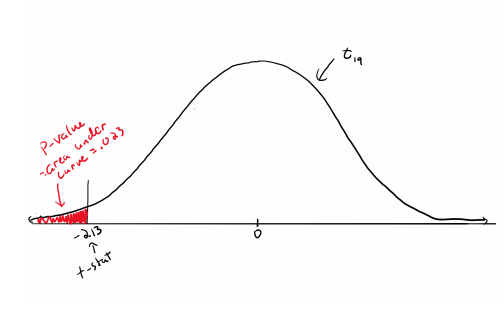

In [13]:
Image(filename = "C:/Users/patri/Desktop/Metrics TA/Images/6.png")

For HA : µ∆scraprate ̸= 0. We simply need to access the P value from before since this is just a two tailed test.


In [14]:
# 7. Two Tailed this is just our p value from before

print(p)

0.04468972800509544


The third alternative is HA : µ∆scraprate > 0, essentially making our null H0 : µ∆scraprate ≤ 0. Under this
alternative, our pvalue is extremely high we fail to reject at all plausible levels.

In [15]:
# 8. One tailed greater than test
oneTailed(t,p, 0.01, 'greater')
oneTailed(t,p, 0.05, 'greater')
oneTailed(t,p, 0.10, 'greater')

 The p value is  0.02234486400254772
Fail to Reject Null Hypothesis for greater-than test at  1.0 %
 The p value is  0.02234486400254772
Fail to Reject Null Hypothesis for greater-than test at  5.0 %
 The p value is  0.02234486400254772
Fail to Reject Null Hypothesis for greater-than test at  10.0 %


For this hypothesis test, the pvalue is the following areas:

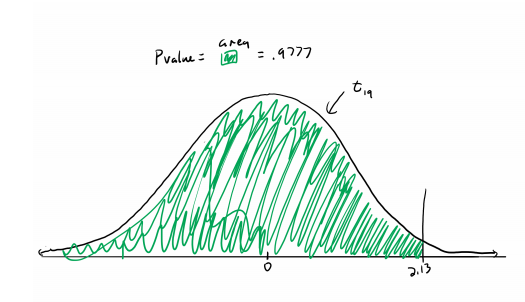

In [16]:
Image(filename = "C:/Users/patri/Desktop/Metrics TA/Images/8.png")

Here, the third alternative is probably of little interest. In this situation, we are likely most interested in the
first alternative hypothesis listed above (we assume that worker training does not have a negative effect). If we are
just interested in any departure from the null, we would use the second alternative hypothesis listed above. With
either of these alternatives, we would conclude that we would reject the null that there is no effect of training on
worker productivity at 5%.

